In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

import time
from scipy import stats
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import math
from copy import copy

import collections.abc
from tqdm import tqdm


np.random.seed(1234)

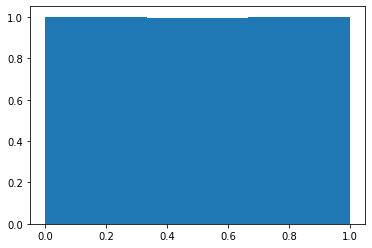

In [2]:
arr = np.random.uniform(0,1,100000)

plt.hist(arr, bins=3, density=True, cumulative=False)
plt.show()

In [60]:
def shift_1(x, k=0.5, p=[1./3, 1./3, 1./3]):
    #
    #  shape of x = 2
    #
    prob = np.random.uniform(0, 1)
    #print(prob)
    ans = x * k
    # go to B (0, 1)
    if prob < p[0]:
        ans += (1-k) * np.array((1, 0)) 
    # go to C (1, 0)
    elif prob < p[0] + p[1]:
        ans += (1-k) * np.array((0, 1))
    # go to A (0, 0)
    else:
        # do nothing
        pass
    return ans

In [3]:
def shift(x, k=0.5, O=np.array(((0, 0), (1, 0), (0, 1))), p=[1./3, 1./3, 1./3]):
    #
    # now support "vector arrays"
    #
    if( not isinstance(k, (collections.abc.Sequence, np.ndarray))):
        k=np.full(len(O), k)
    if( not isinstance(x[0], (collections.abc.Sequence, np.ndarray))):
        x = x.reshape((1, 2))
    eps = np.random.choice(np.arange(len(O)), size=len(x), p=p) 
    sample_k = np.array([k[i] for i in eps]).reshape((-1, 1))
    sample_O = np.array([O[i] for i in eps])
    #print(sample_k, '\n', sample_O, '\n', x)
    if len(x) > 1:
        return sample_k * x + (1 - sample_k) * sample_O
    return (sample_k * x + (1 - sample_k) * sample_O).reshape(2)

In [84]:
shift(points[0])

0.9528070735989724


array([0.17202331, 0.25366516])

In [86]:
shift(points[0])

0.4893705566437516


array([0.17202331, 0.75366516])

In [79]:
shift(points[0])

0.2102568111286256


array([0.67202331, 0.25366516])

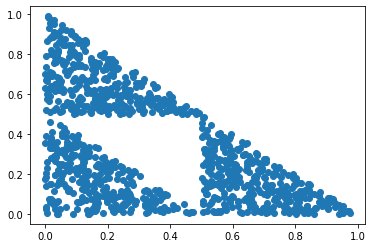

In [95]:
points2 = np.array([shift(x) for x in points])
plt.scatter(points2[:, 0], points2[:, 1])
plt.show()

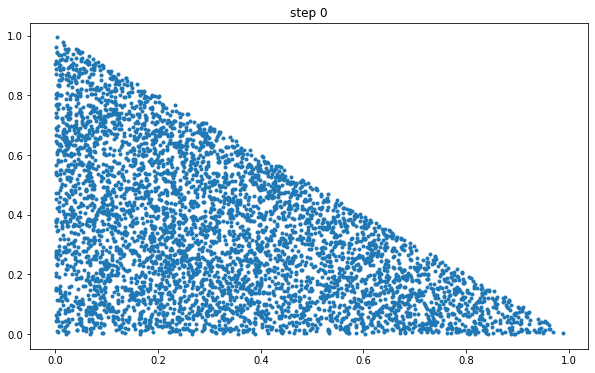

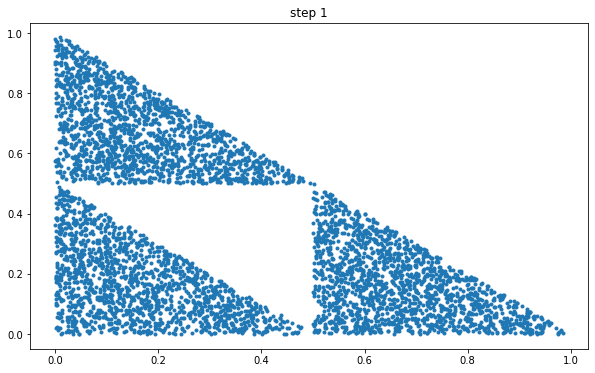

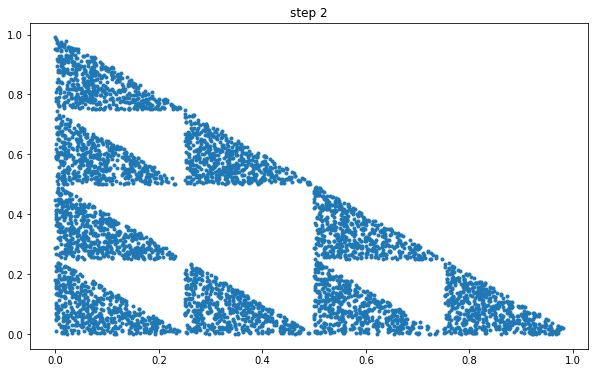

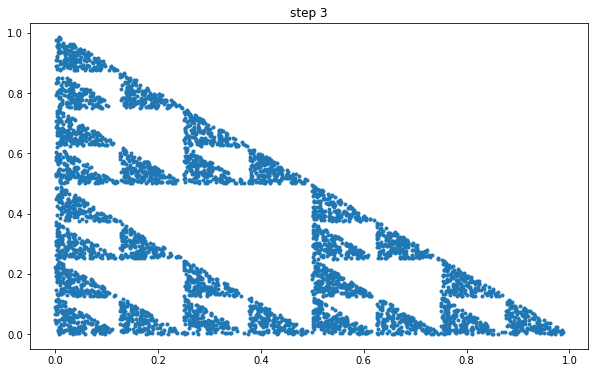

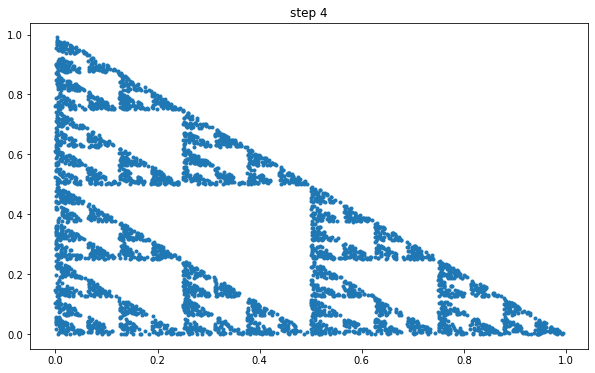

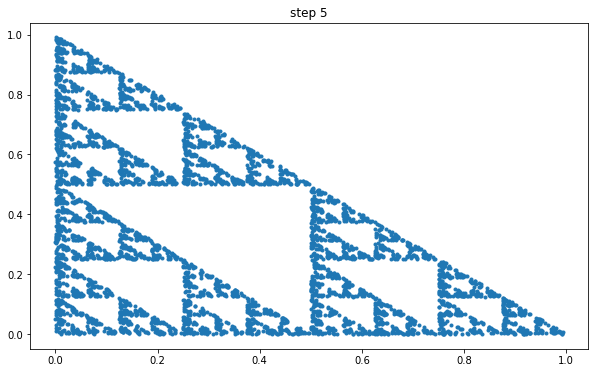

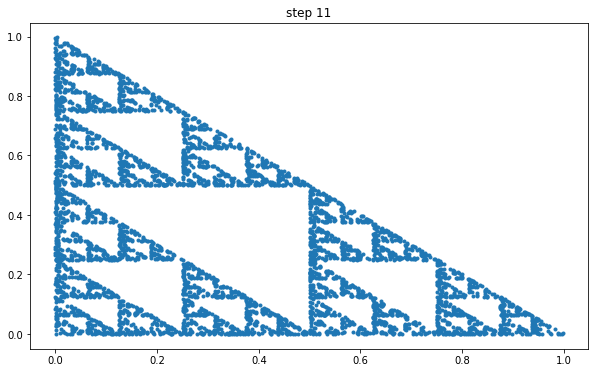

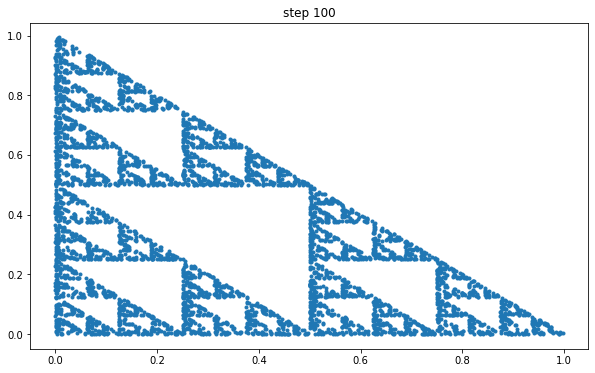

In [110]:
#
#    point are independent
#
n = 5000    # amount of points
k = 0.5     # coef for shift
plot_step = (0, 1, 2, 3, 4, 10, 100, 1000, 5000)    # plot on these steps

points = np.random.rand(n, 2)
# make all points in triangдe
points[points[:, 0] + points[:, 1] >= 1] = -points[points[:, 0] + points[:, 1] >= 1] + 1

plt.figure(figsize=(10,6))
plt.scatter(points[:, 0], points[:, 1], marker='.')
plt.title('step 0')
plt.show()


for i in range(100):
    points = np.array([shift(x, k) for x in points])
    if i in plot_step:
        plt.figure(figsize=(10,6))
        plt.scatter(points[:, 0], points[:, 1], marker='.')
        plt.title(f'step {i+1}')
        plt.show()
        
plt.figure(figsize=(10,6))
plt.scatter(points[:, 0], points[:, 1], marker='.')
plt.title(f'step {i+1}')
plt.show()

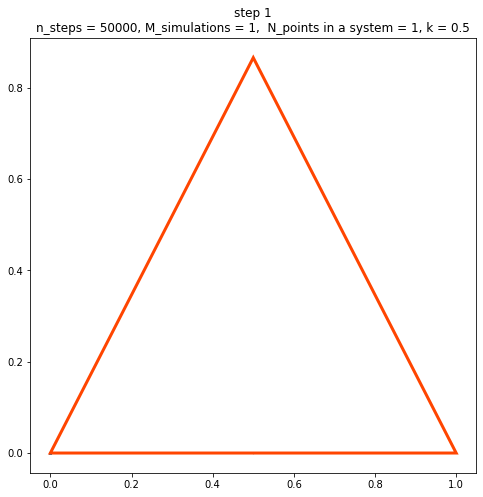

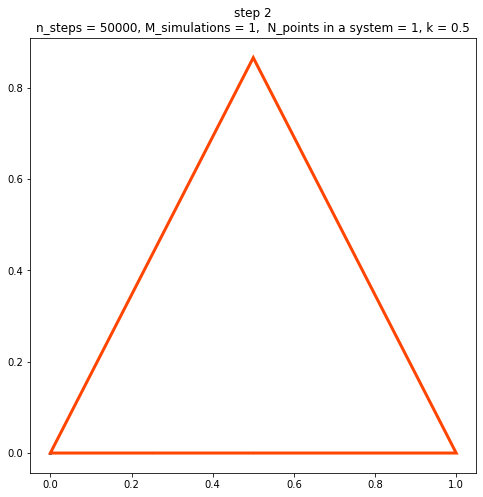

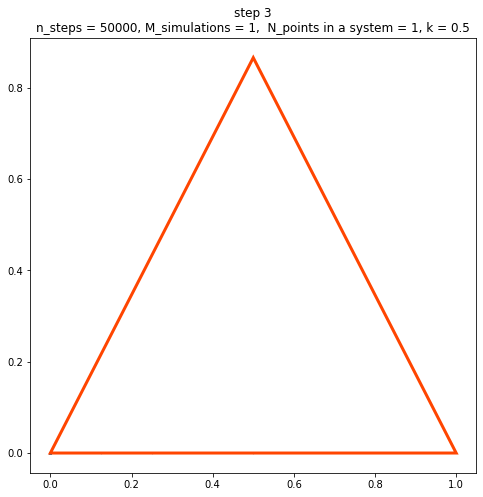

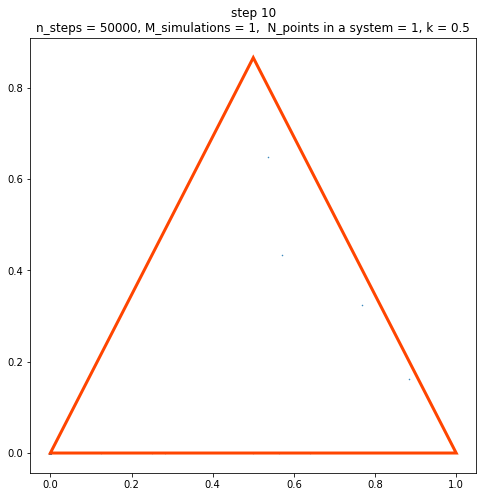

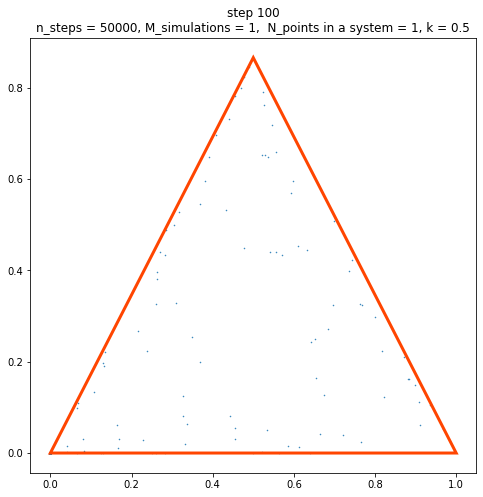

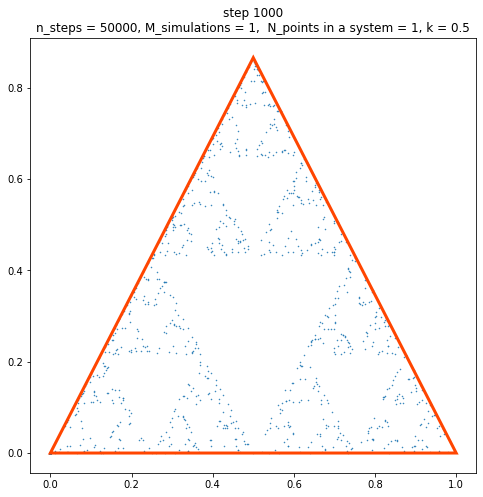

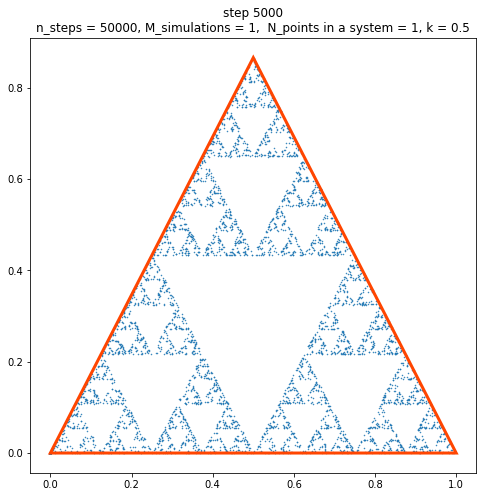

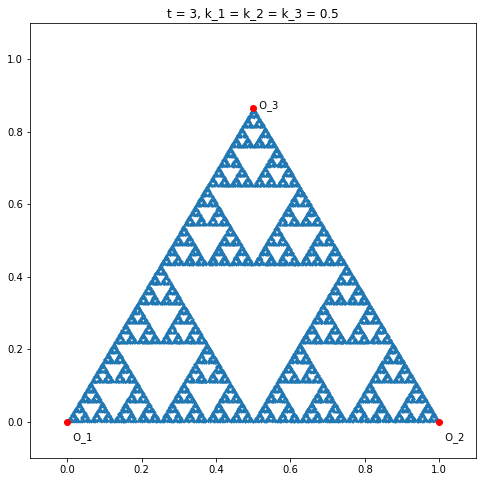

In [4]:
#
#    trajectory of a point
#
n = 50000       # amount of steps
M = 1    # amount of simulation
N = 1      # amount of points in system simulation
k = 0.5     # coef for shift
plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [0, 1]]), fc='none', ec='orangered', lw=3)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)



#points = np.random.rand(M, N, 2)
points = np.zeros((n, 2))
# make all points in triangдe
# points[points[:, :, 0] + points[:, :, 1] >= 1] = -points[points[:, :, 0] + points[:, :, 1] >= 1] + 1

for i in range(1, n):
    points[i] = shift(points[i-1], k)
    if i in plot_step:
        plt.figure(figsize=(8,8))
        plt.scatter(points[:, 0] + 0.5 * points[:, 1], np.sqrt(3) / 2 * points[:, 1], marker='.', s=1)
        #plt.scatter(1./3, 1./3, marker='o', color='red') 
        #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
        #plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='+', color='green')
        #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
        #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
        #            marker='+', color='green')
        plt.gca().add_patch(copy(polygon2))
        #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
        plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N}, k = {k}')
        plt.show()
        
        
        
point_names = ['  O_1', '  O_2', '  O_3']
points_O = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]])


        
plt.figure(figsize=(8,8))
plt.scatter(points[:, 0] + 0.5 * points[:, 1], np.sqrt(3) / 2 * points[:, 1], marker='.', s=1)
#plt.scatter(1./3, 1./3, marker='o', color='red', s=1)
#plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
#plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
#            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
#            marker='+', color='green')
#plt.gca().add_patch(copy(polygon2))

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')

for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0], 
                                                                np.array((-0.05, -0.05, np.sqrt(3) / 2))[i])
                )

plt.title(f't = {i+1}, k_1 = k_2 = k_3 = {k}') # \nt_steps = {n}
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()


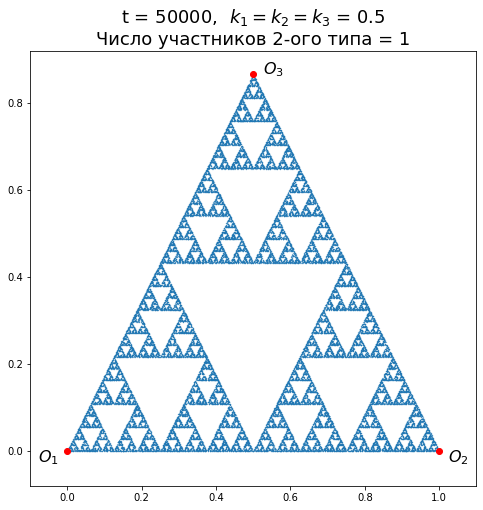

In [5]:
point_names = ['$O_1$', ' $O_2$', '  $O_3$']
plt.figure(figsize=(8,8))
plt.scatter(points[:, 0] + 0.5 * points[:, 1], np.sqrt(3) / 2 * points[:, 1], marker='.', s=0.2)

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')

for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(np.array((-0.08, 1.01, 0.5))[i], 
                                                                np.array((-0.025, -0.025, np.sqrt(3) / 2))[i]),
                 fontsize=16
                )

plt.title(f't = {n},  $k_1 = k_2 = k_3$ = {k}\nЧисло участников 2-ого типа = {N}', fontsize=18) # \nt_steps = {n}
plt.xlim((-0.1, 1.1))
plt.ylim((-0.08, 0.92))
plt.show()

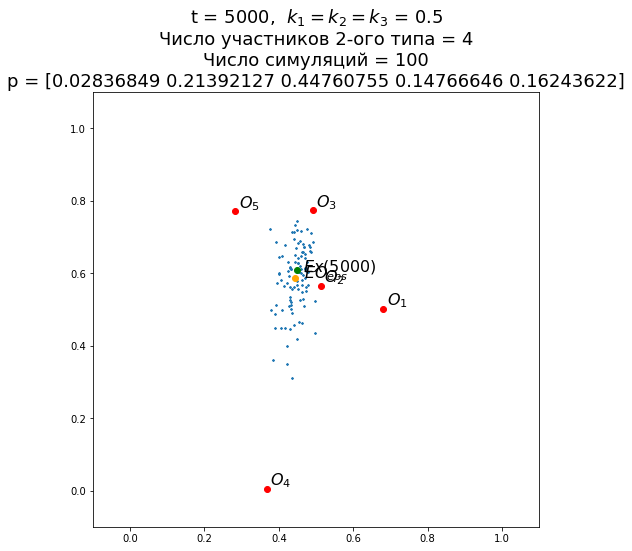

--- 65.52229690551758 seconds ---


In [81]:
#
#    with new shift function 
#

#    trajectory of points
#
t = 5000       # amount of steps
M = 100    # amount of simulation
N = 4      # amount of points in system simulation
k = 0.5     # coef for shift
n = 5      # amount of points centers
plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [0, 1]]), fc='none', ec='orangered', lw=3)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)

# point_names = ['$O_1$', ' $O_2$', '  $O_3$']
# points_O = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]])
points_O = np.random.rand(n, 2)
point_names = []
for i in range(len(points_O)):
    point_names.append(f'$O_{i+1}$')
    
# p = np.full((n), 1./n)
p = np.random.rand(n)
p = p / p.sum()


points = np.zeros((t, M, N, 2))
points[0] = np.random.rand(M, N, 2)
# points[0][points[0, :, 0] + points[0, :, 1] >= 1] = -points[0][points[0, :, 0] + points[0, :, 1] >= 1] + 1


start_time = time.time()

for i in range(1, t):
    for j in range(M):
    #points[i] = np.array([shift(x, k) for x in points[i-1]])
        points[i, j] = shift(x=points[i-1, j], k=k, O=points_O, p=p)
        '''
        if i in plot_step:
            plt.figure(figsize=(8,8))
            plt.scatter(points[i, :, 0] + 0.5 * points[i, :, 1], np.sqrt(3) / 2 * points[i, :, 1])
            #plt.scatter(1./3, 1./3, marker='o', color='red') 
            #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
            #plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='+', color='green')
            #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
            #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
            #            marker='+', color='green')
            plt.gca().add_patch(copy(polygon2))
            #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
            plt.title(f'step {i}\nt_steps = {n},  N_points in a system = {N}, k = {k}')
            plt.show()
        '''
        points[i, j][:, 0].fill(points[i, j].sum(axis=0)[0] / N)
        points[i, j][:, 1].fill(points[i, j].sum(axis=0)[1] / N)
        
# plt.figure(figsize=(8,8))
# plt.scatter(points[i, :, 0] + 0.5 * points[i, :, 1], np.sqrt(3) / 2 * points[i, :, 1])
# #plt.scatter(1./3, 1./3, marker='o', color='red', s=1)
# #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
# #plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
# #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
# #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
# #            marker='+', color='green')
# plt.gca().add_patch(copy(polygon2))
# plt.title(f'step {i+1}\nt_steps = {n}, N_points in a system = {N}, k = {k}')
# plt.show()

# trajectory
plt.figure(figsize=(8,8))

plt.scatter(points[-1, :, :, 0], points[-1, :, :, 1], s=1) # last position

plt.scatter(points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean(), color='orange') # mean of simulations
plt.annotate(f'$Ex({t})$', (points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean()), 
             xytext=(points[-1, :, :, 0].mean() + 0.02, points[-1, :, :, 1].mean() + 0.02),
             fontsize=16
            )

# k*points[0, :, :, 0].mean() + (1-k)*(p * points_O[:, 0]).mean()
plt.scatter((p * points_O[:, 0]).sum(), 
            (p * points_O[:, 1]).sum() , color='green') # predicted mean
plt.annotate('$EO_{eps}$', ((p * points_O[:, 0]).sum(), 
                            (p * points_O[:, 1]).sum()), 
             xytext=((p * points_O[:, 0]).sum() + 0.02, 
                     (p * points_O[:, 1]).sum() - 0.02),
             fontsize=16
            )

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0] + 0.01, points_O[i, 1] + 0.01),
                 fontsize=16
                )

# plt.annotate(f'  x({n})', (points[-1, 0, 0] + 0.5 * points[-1, 0, 1], np.sqrt(3) / 2 * points[-1, 0, 1]), fontsize=16)
    
# plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=0.1)
# plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=0.1)
# plt.gca().add_patch(copy(polygon2)) 

plt.title(f't = {t},  $k_1 = k_2 = k_3$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

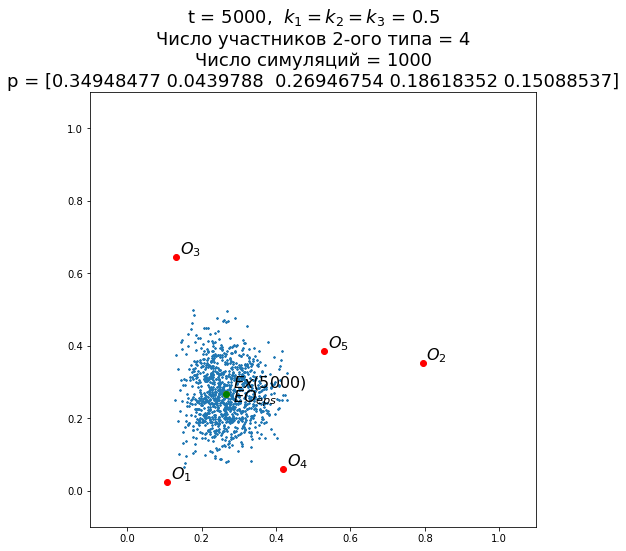

--- 651.8572828769684 seconds ---


In [82]:
#
#    with new shift function 
#

#    trajectory of points
#
t = 5000       # amount of steps
M = 1000    # amount of simulation
N = 4      # amount of points in system simulation
k = 0.5     # coef for shift
n = 5      # amount of points centers
plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [0, 1]]), fc='none', ec='orangered', lw=3)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)

# point_names = ['$O_1$', ' $O_2$', '  $O_3$']
# points_O = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]])
points_O = np.random.rand(n, 2)
point_names = []
for i in range(len(points_O)):
    point_names.append(f'$O_{i+1}$')
    
# p = np.full((n), 1./n)
p = np.random.rand(n)
p = p / p.sum()


points = np.zeros((t, M, N, 2))
points[0] = np.random.rand(M, N, 2)
# points[0][points[0, :, 0] + points[0, :, 1] >= 1] = -points[0][points[0, :, 0] + points[0, :, 1] >= 1] + 1


start_time = time.time()

for i in range(1, t):
    for j in range(M):
        points[i, j] = shift(x=points[i-1, j], k=k, O=points_O, p=p)
        '''
        if i in plot_step:
            plt.figure(figsize=(8,8))
            plt.scatter(points[i, :, 0] + 0.5 * points[i, :, 1], np.sqrt(3) / 2 * points[i, :, 1])
            #plt.scatter(1./3, 1./3, marker='o', color='red') 
            #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
            #plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='+', color='green')
            #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
            #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
            #            marker='+', color='green')
            plt.gca().add_patch(copy(polygon2))
            #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
            plt.title(f'step {i}\nt_steps = {n},  N_points in a system = {N}, k = {k}')
            plt.show()
        '''
        points[i, j][:, 0].fill(points[i, j].sum(axis=0)[0] / N)
        points[i, j][:, 1].fill(points[i, j].sum(axis=0)[1] / N)
        

plt.figure(figsize=(8,8))

plt.scatter(points[-1, :, :, 0], points[-1, :, :, 1], s=1) # last position

plt.scatter(points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean(), color='orange') # mean of simulations
plt.annotate(f'$Ex({t})$', (points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean()), 
             xytext=(points[-1, :, :, 0].mean() + 0.02, points[-1, :, :, 1].mean() + 0.02),
             fontsize=16
            )

# k*points[0, :, :, 0].mean() + (1-k)*(p * points_O[:, 0]).mean()
plt.scatter((p * points_O[:, 0]).sum(), 
            (p * points_O[:, 1]).sum() , color='green') # predicted mean
plt.annotate('$EO_{eps}$', ((p * points_O[:, 0]).sum(), 
                            (p * points_O[:, 1]).sum()), 
             xytext=((p * points_O[:, 0]).sum() + 0.02, 
                     (p * points_O[:, 1]).sum() - 0.02),
             fontsize=16
            )

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0] + 0.01, points_O[i, 1] + 0.01),
                 fontsize=16
                )

# plt.annotate(f'  x({n})', (points[-1, 0, 0] + 0.5 * points[-1, 0, 1], np.sqrt(3) / 2 * points[-1, 0, 1]), fontsize=16)
    
# plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=0.1)
# plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=0.1)
# plt.gca().add_patch(copy(polygon2)) 

plt.title(f't = {t},  $k$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.1, 1.1))
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

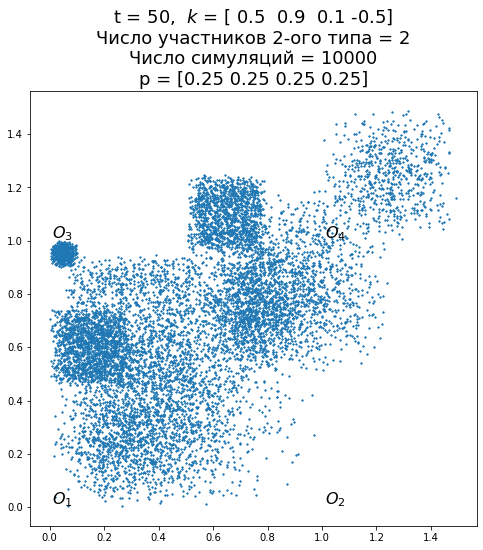

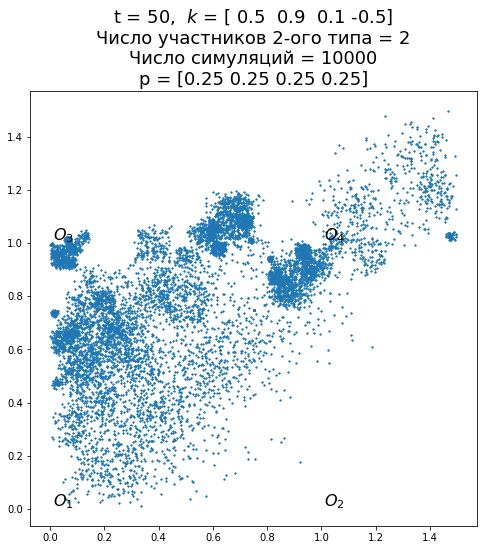

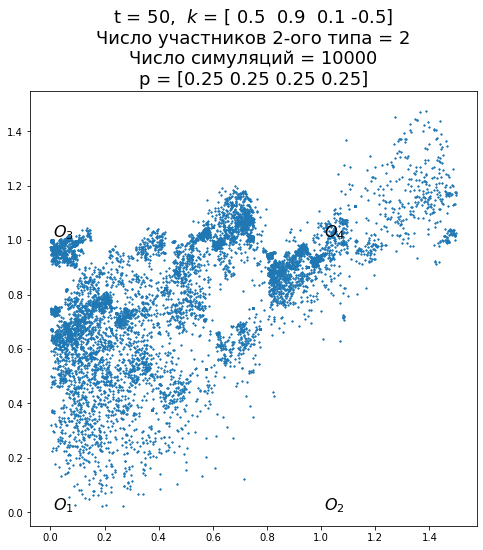

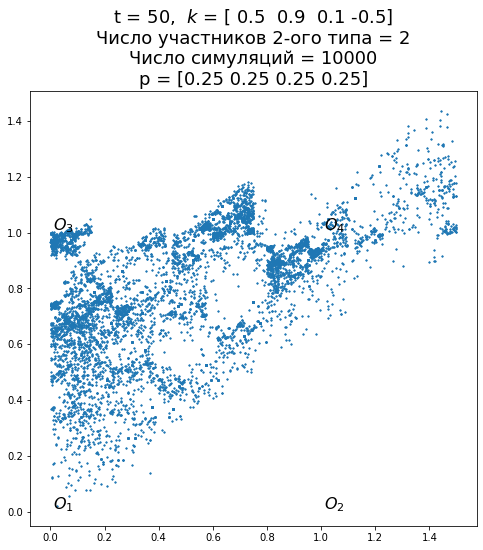

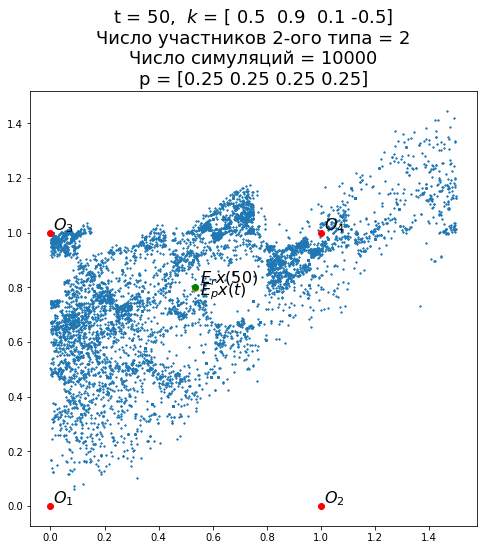

--- 28.913989543914795 seconds ---


In [62]:
#
#    with new shift function 
#

#    trajectory of points
#
t = 50       # amount of steps
M = 10000    # amount of simulation
N = 2      # amount of points in system simulation
k = [0.5, 0.9, 0.1, -0.5]     # coef for shift      <-- must be changed simultaneously
n = 4      # amount of points centers               <-- must be changed simultaneously 

points_O = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])           #   <-- must be changed simultaneously
# points_O = np.random.rand(n, 2)
point_names = []
for i in range(len(points_O)):
    point_names.append(f'$O_{i+1}$')


plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [0, 1]]), fc='none', ec='orangered', lw=3)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)


    

if( not isinstance(k, (collections.abc.Sequence, np.ndarray))):
    k=np.full(len(O), k)
else:
    k=np.array(k)
    
p = np.full((n), 1./n)
# p = np.random.rand(n)
# p = p / p.sum()


points = np.zeros((t, M, N, 2))
points[0] = np.random.rand(M, N, 2)
# points[0][points[0, :, 0] + points[0, :, 1] >= 1] = -points[0][points[0, :, 0] + points[0, :, 1] >= 1] + 1


start_time = time.time()

for i in range(1, t):
    for j in range(M):
        points[i, j] = shift(x=points[i-1, j], k=k, O=points_O, p=p)
        points[i, j][:, 0].fill(points[i, j].sum(axis=0)[0] / N)
        points[i, j][:, 1].fill(points[i, j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(8,8))
        plt.scatter(points[i, :, :, 0], points[i, :, :, 1], s=1)
        for ii, txt in enumerate(point_names):
            plt.annotate(txt, (points_O[ii, 0], points_O[ii, 1]), 
                         xytext=(points_O[ii, 0] + 0.01, points_O[ii, 1] + 0.01), fontsize=16)
        plt.title(f't = {t},  $k$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
        plt.show()

        
        

plt.figure(figsize=(8,8))

plt.scatter(points[-1, :, :, 0], points[-1, :, :, 1], s=1) # last position

plt.scatter(points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean(), color='orange') # mean of simulations
plt.annotate(f'$E_r x({t})$', (points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean()), 
             xytext=(points[-1, :, :, 0].mean() + 0.02, points[-1, :, :, 1].mean() + 0.02),
             fontsize=16
            )

# k*points[0, :, :, 0].mean() + (1-k)*(p * points_O[:, 0]).mean()
ev = (p * k).sum()**t * points[0].mean(axis=0).mean(axis=0) \
    + 1./(1 - (p * k).sum()) * ((p * (1 - k)).reshape((n, 1)) * points_O).sum(axis=0)
plt.scatter(ev[0], ev[1], color='green') # predicted mean
plt.annotate('$E_p x({t})$', (ev[0], ev[1]), xytext=(ev[0] + 0.02, ev[1] - 0.03), fontsize=16)
# plt.scatter((p * points_O[:, 0]).sum(), 
#             (p * points_O[:, 1]).sum() , color='green') # predicted mean
# plt.annotate('$EO_{eps}$', ((p * points_O[:, 0]).sum(), 
#                             (p * points_O[:, 1]).sum()), 
#              xytext=((p * points_O[:, 0]).sum() + 0.02, 
#                      (p * points_O[:, 1]).sum() - 0.02),
#              fontsize=16
#             )

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0] + 0.01, points_O[i, 1] + 0.01),
                 fontsize=16
                )

# plt.annotate(f'  x({n})', (points[-1, 0, 0] + 0.5 * points[-1, 0, 1], np.sqrt(3) / 2 * points[-1, 0, 1]), fontsize=16)
    
# plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=0.1)
# plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=0.1)
# plt.gca().add_patch(copy(polygon2)) 

plt.title(f't = {t},  $k$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
# plt.xlim((-0.1, 1.1))
# plt.ylim((-0.1, 1.1))
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

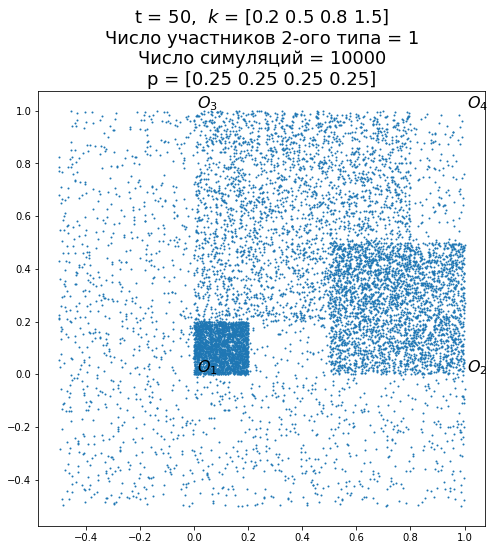

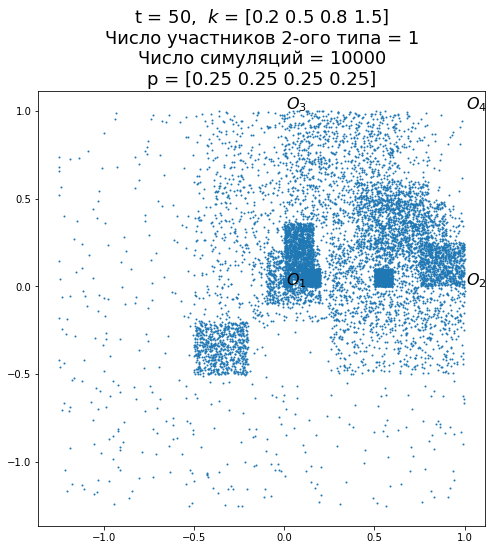

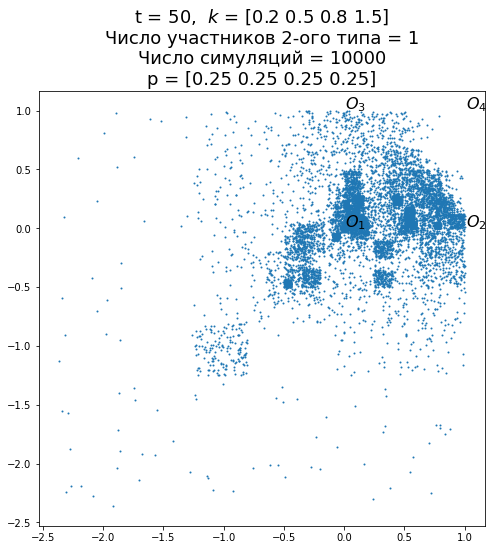

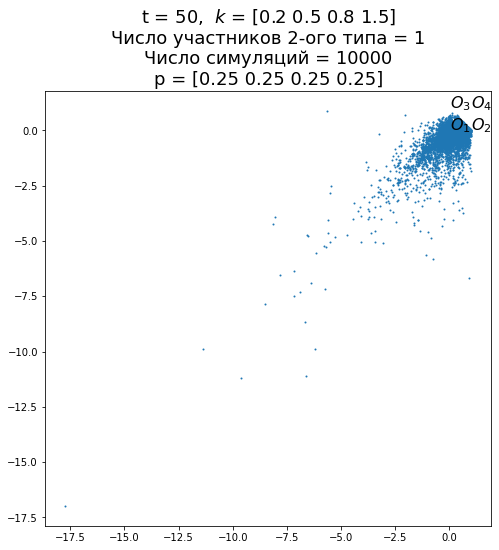

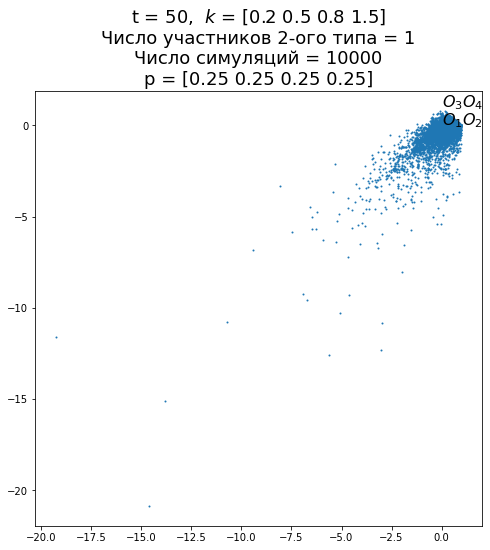

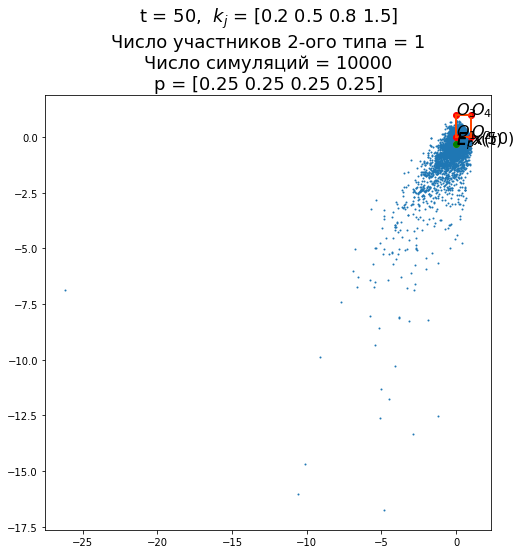

--- 29.992417335510254 seconds ---


In [7]:
#
#    with new shift function 
#

#    trajectory of points
#
t = 50       # amount of steps
M = 10000    # amount of simulation
N = 1      # amount of points in system simulation
k = [0.2, 0.5, 0.8, 1.5]     # coef for shift      <-- must be changed simultaneously
n = 4      # amount of points centers               <-- must be changed simultaneously 

points_O = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])           #   <-- must be changed simultaneously
# points_O = np.random.rand(n, 2)
point_names = []
for i in range(len(points_O)):
    point_names.append(f'$O_{i+1}$')

p = np.full((n), 1./n)    # probability of choosing a center
# p = np.random.rand(n)
# p = p / p.sum()

plot_step = (0, 1, 2, 3, 10, 20, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [1, 1], [0, 1]]), fc='none', ec='orangered', lw=2)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)


    

if( not isinstance(k, (collections.abc.Sequence, np.ndarray))):
    k=np.full(len(O), k)
else:
    k=np.array(k)


points = np.zeros((t, M, N, 2))
points[0] = np.random.rand(M, N, 2)
# points[0][points[0, :, 0] + points[0, :, 1] >= 1] = -points[0][points[0, :, 0] + points[0, :, 1] >= 1] + 1


start_time = time.time()

for i in range(1, t):
    for j in range(M):
        points[i, j] = shift(x=points[i-1, j], k=k, O=points_O, p=p)
        points[i, j][:, 0].fill(points[i, j].sum(axis=0)[0] / N)
        points[i, j][:, 1].fill(points[i, j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(8,8))
        plt.scatter(points[i, :, :, 0], points[i, :, :, 1], s=1)
        for ii, txt in enumerate(point_names):
            plt.annotate(txt, (points_O[ii, 0], points_O[ii, 1]), 
                         xytext=(points_O[ii, 0] + 0.01, points_O[ii, 1] + 0.01), fontsize=16)
        plt.title(f't = {t},  $k$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
        plt.show()

        
        

plt.figure(figsize=(8,8))

plt.scatter(points[-1, :, :, 0], points[-1, :, :, 1], s=1) # last position

plt.scatter(points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean(), color='orange') # mean of simulations
plt.annotate(f'$E_r x({t})$', (points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean()), 
             xytext=(points[-1, :, :, 0].mean() + 0.02, points[-1, :, :, 1].mean() + 0.02),
             fontsize=16
            )

# k*points[0, :, :, 0].mean() + (1-k)*(p * points_O[:, 0]).mean()
ev = (p * k).sum()**t * points[0].mean(axis=0).mean(axis=0) \
    + 1./(1 - (p * k).sum()) * ((p * (1 - k)).reshape((n, 1)) * points_O).sum(axis=0)
plt.scatter(ev[0], ev[1], color='green') # predicted mean
plt.annotate('$E_p x({t})$', (ev[0], ev[1]), xytext=(ev[0] + 0.02, ev[1] - 0.03), fontsize=16)
# plt.scatter((p * points_O[:, 0]).sum(), 
#             (p * points_O[:, 1]).sum() , color='green') # predicted mean
# plt.annotate('$EO_{eps}$', ((p * points_O[:, 0]).sum(), 
#                             (p * points_O[:, 1]).sum()), 
#              xytext=((p * points_O[:, 0]).sum() + 0.02, 
#                      (p * points_O[:, 1]).sum() - 0.02),
#              fontsize=16
#             )

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0] + 0.01, points_O[i, 1] + 0.01),
                 fontsize=16
                )

# plt.annotate(f'  x({n})', (points[-1, 0, 0] + 0.5 * points[-1, 0, 1], np.sqrt(3) / 2 * points[-1, 0, 1]), fontsize=16)
    
# plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=0.1)
# plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=0.1)
plt.gca().add_patch(copy(polygon)) 

plt.title(f't = {t},  $k_j$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
# plt.xlim((-0.1, 1.1))
# plt.ylim((-0.1, 1.1))
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

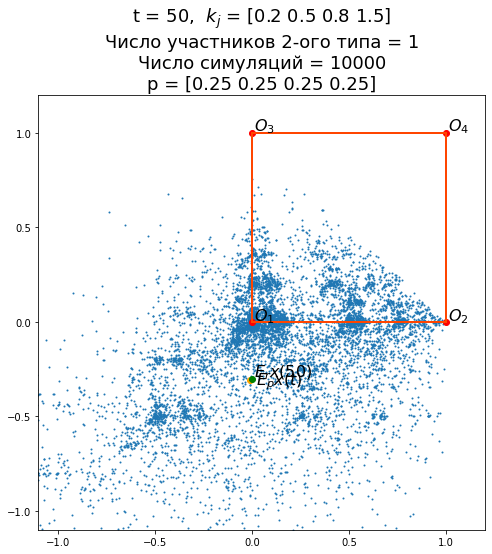

In [10]:
plt.figure(figsize=(8,8))

plt.scatter(points[-1, :, :, 0], points[-1, :, :, 1], s=1) # last position

plt.scatter(points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean(), color='orange') # mean of simulations
plt.annotate(f'$E_r x({t})$', (points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean()), 
             xytext=(points[-1, :, :, 0].mean() + 0.02, points[-1, :, :, 1].mean() + 0.02),
             fontsize=16
            )

# k*points[0, :, :, 0].mean() + (1-k)*(p * points_O[:, 0]).mean()
ev = (p * k).sum()**t * points[0].mean(axis=0).mean(axis=0) \
    + 1./(1 - (p * k).sum()) * ((p * (1 - k)).reshape((n, 1)) * points_O).sum(axis=0)
plt.scatter(ev[0], ev[1], color='green') # predicted mean
plt.annotate('$E_p x({t})$', (ev[0], ev[1]), xytext=(ev[0] + 0.02, ev[1] - 0.03), fontsize=16)
# plt.scatter((p * points_O[:, 0]).sum(), 
#             (p * points_O[:, 1]).sum() , color='green') # predicted mean
# plt.annotate('$EO_{eps}$', ((p * points_O[:, 0]).sum(), 
#                             (p * points_O[:, 1]).sum()), 
#              xytext=((p * points_O[:, 0]).sum() + 0.02, 
#                      (p * points_O[:, 1]).sum() - 0.02),
#              fontsize=16
#             )

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0] + 0.01, points_O[i, 1] + 0.01),
                 fontsize=16
                )

# plt.annotate(f'  x({n})', (points[-1, 0, 0] + 0.5 * points[-1, 0, 1], np.sqrt(3) / 2 * points[-1, 0, 1]), fontsize=16)
    
# plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=0.1)
# plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=0.1)
plt.gca().add_patch(copy(polygon)) 

plt.title(f't = {t},  $k_j$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
# plt.xlim((-0.1, 1.1))
# plt.ylim((-0.1, 1.1))
plt.xlim((-1.1, 1.2))
plt.ylim((-1.1, 1.2))
plt.show()

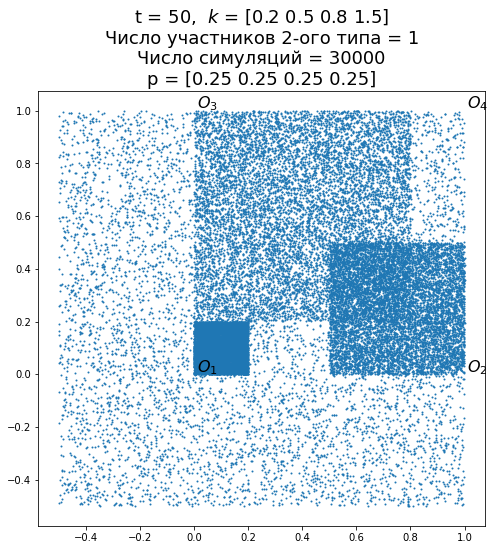

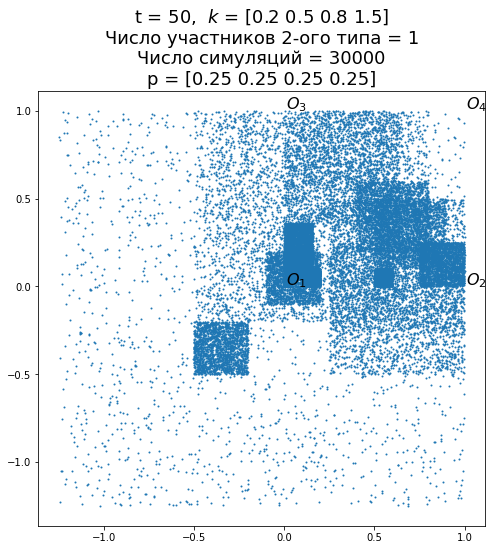

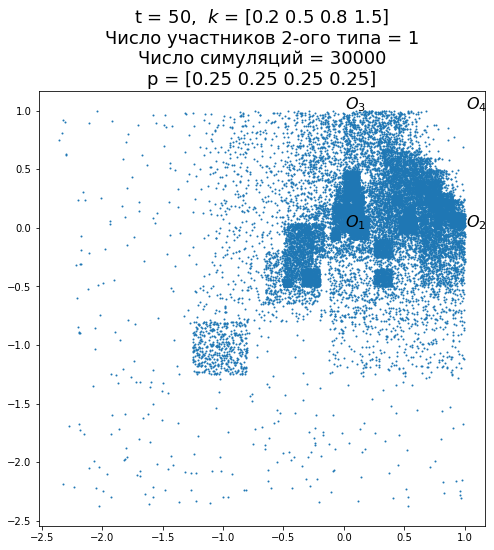

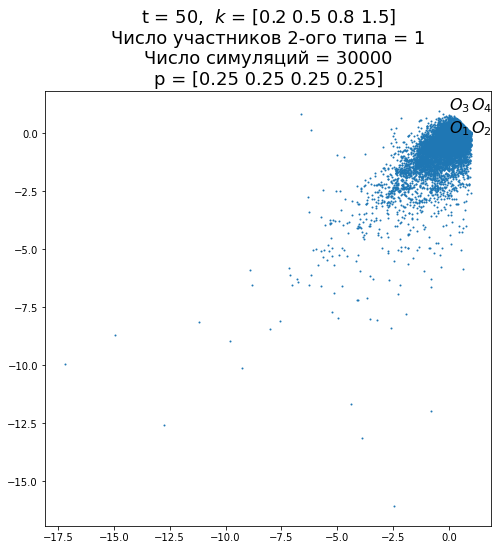

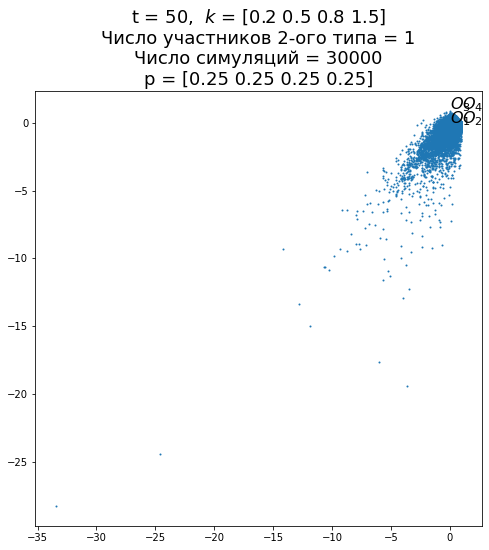

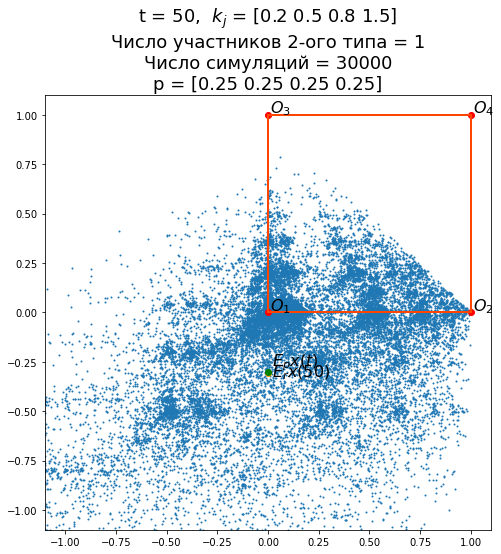

--- 85.6684741973877 seconds ---


In [11]:
#
#    with new shift function 
#

#    trajectory of points
#
t = 50       # amount of steps
M = 30000    # amount of simulation
N = 1      # amount of points in system simulation
k = [0.2, 0.5, 0.8, 1.5]     # coef for shift      <-- must be changed simultaneously
n = 4      # amount of points centers               <-- must be changed simultaneously 

points_O = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])           #   <-- must be changed simultaneously
# points_O = np.random.rand(n, 2)
point_names = []
for i in range(len(points_O)):
    point_names.append(f'$O_{i+1}$')

p = np.full((n), 1./n)    # probability of choosing a center
# p = np.random.rand(n)
# p = p / p.sum()

plot_step = (0, 1, 2, 3, 10, 20, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [1, 1], [0, 1]]), fc='none', ec='orangered', lw=2)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)


    

if( not isinstance(k, (collections.abc.Sequence, np.ndarray))):
    k=np.full(len(O), k)
else:
    k=np.array(k)


points = np.zeros((t, M, N, 2))
points[0] = np.random.rand(M, N, 2)
# points[0][points[0, :, 0] + points[0, :, 1] >= 1] = -points[0][points[0, :, 0] + points[0, :, 1] >= 1] + 1


start_time = time.time()

for i in range(1, t):
    for j in range(M):
        points[i, j] = shift(x=points[i-1, j], k=k, O=points_O, p=p)
        points[i, j][:, 0].fill(points[i, j].sum(axis=0)[0] / N)
        points[i, j][:, 1].fill(points[i, j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(8,8))
        plt.scatter(points[i, :, :, 0], points[i, :, :, 1], s=1)
        for ii, txt in enumerate(point_names):
            plt.annotate(txt, (points_O[ii, 0], points_O[ii, 1]), 
                         xytext=(points_O[ii, 0] + 0.01, points_O[ii, 1] + 0.01), fontsize=16)
        plt.title(f't = {i},  $k_j$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
        plt.show()

        
        

plt.figure(figsize=(8,8))

plt.scatter(points[-1, :, :, 0], points[-1, :, :, 1], s=1) # last position

plt.scatter(points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean(), color='orange') # mean of simulations
plt.annotate(f'$E_r x({t})$', (points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean()), 
             xytext=(points[-1, :, :, 0].mean() + 0.02, points[-1, :, :, 1].mean() - 0.02),
             fontsize=16
            )

# k*points[0, :, :, 0].mean() + (1-k)*(p * points_O[:, 0]).mean()
ev = (p * k).sum()**t * points[0].mean(axis=0).mean(axis=0) \
    + 1./(1 - (p * k).sum()) * ((p * (1 - k)).reshape((n, 1)) * points_O).sum(axis=0)
plt.scatter(ev[0], ev[1], color='green') # predicted mean
plt.annotate('$E_p x({t})$', (ev[0], ev[1]), xytext=(ev[0] + 0.02, ev[1] + 0.03), fontsize=16)

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0] + 0.01, points_O[i, 1] + 0.01),
                 fontsize=16
                )

# plt.annotate(f'  x({n})', (points[-1, 0, 0] + 0.5 * points[-1, 0, 1], np.sqrt(3) / 2 * points[-1, 0, 1]), fontsize=16)
    
# plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=0.1)
# plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=0.1)
plt.gca().add_patch(copy(polygon)) 

plt.title(f't = {t},  $k_j$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
# plt.xlim((-0.1, 1.1))
# plt.ylim((-0.1, 1.1))
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

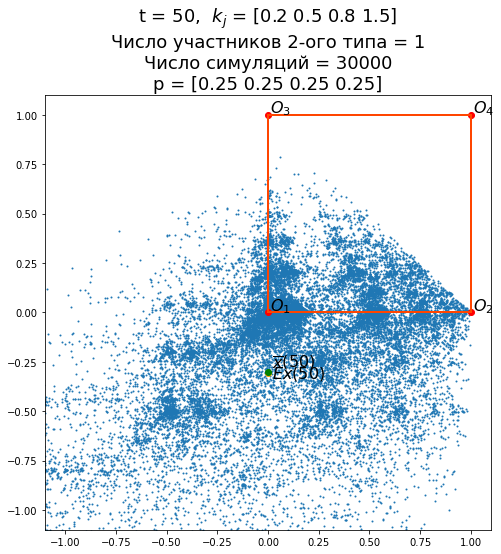

In [19]:
plt.figure(figsize=(8,8))

plt.scatter(points[-1, :, :, 0], points[-1, :, :, 1], s=1) # last position

plt.scatter(points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean(), color='orange') # mean of simulations
plt.annotate('$\overline{x}(%d)}$' %t, (points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean()), 
             xytext=(points[-1, :, :, 0].mean() + 0.02, points[-1, :, :, 1].mean() + 0.03),
             fontsize=16
            )

ev = (p * k).sum()**t * points[0].mean(axis=0).mean(axis=0) \
    + 1./(1 - (p * k).sum()) * ((p * (1 - k)).reshape((n, 1)) * points_O).sum(axis=0)
plt.scatter(ev[0], ev[1], color='green') # predicted mean
plt.annotate(f'$Ex({t})$', (ev[0], ev[1]), xytext=(ev[0] + 0.02, ev[1] - 0.03), fontsize=16)

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0] + 0.01, points_O[i, 1] + 0.01),
                 fontsize=16
                )

plt.gca().add_patch(copy(polygon)) 

plt.title(f't = {t},  $k_j$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.show()


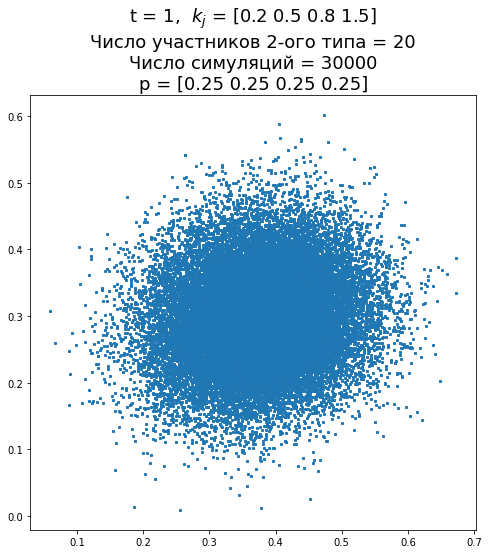

1 --- 2.590769052505493 seconds ---


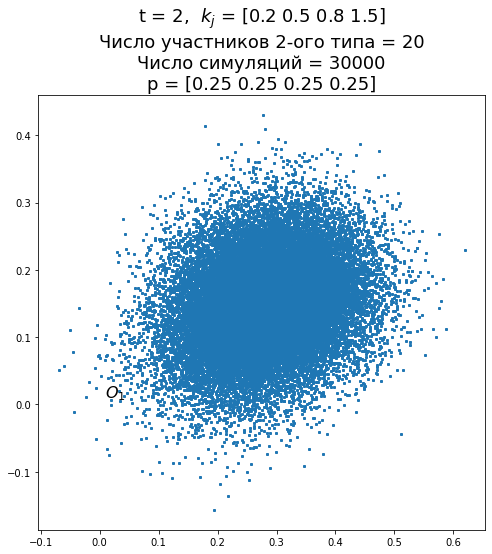

2 --- 5.2122416496276855 seconds ---


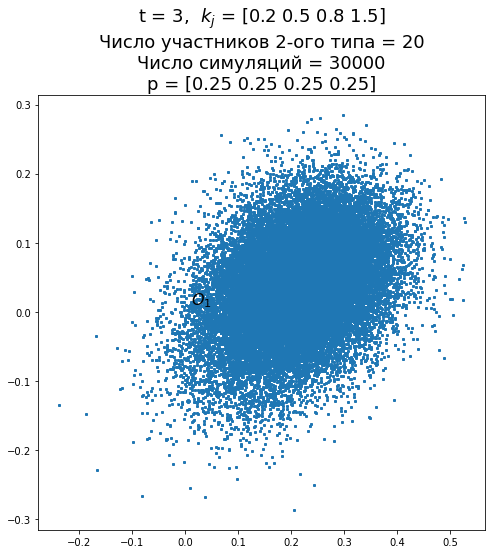

3 --- 7.763315677642822 seconds ---
4 --- 10.048170804977417 seconds ---
5 --- 12.400257587432861 seconds ---
6 --- 14.707170724868774 seconds ---
7 --- 17.04239273071289 seconds ---
8 --- 19.247413873672485 seconds ---
9 --- 21.4631564617157 seconds ---


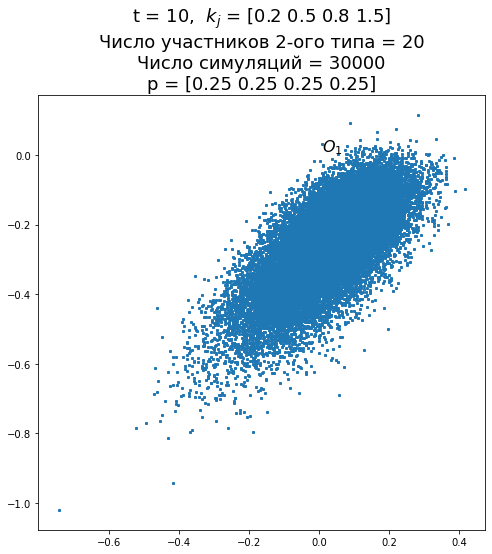

10 --- 23.922740697860718 seconds ---
11 --- 26.164287328720093 seconds ---
12 --- 28.501115322113037 seconds ---
13 --- 30.65218710899353 seconds ---
14 --- 32.81484770774841 seconds ---
15 --- 35.021754026412964 seconds ---
16 --- 37.191007137298584 seconds ---
17 --- 39.343093395233154 seconds ---
18 --- 41.5336217880249 seconds ---
19 --- 43.79134440422058 seconds ---


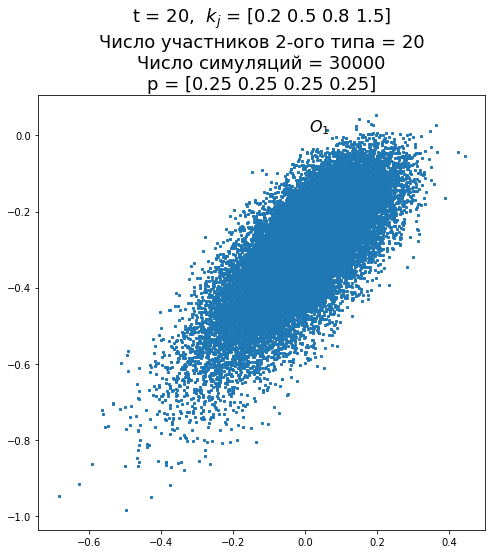

20 --- 46.22597575187683 seconds ---
21 --- 48.452831983566284 seconds ---
22 --- 50.74137568473816 seconds ---
23 --- 53.03521156311035 seconds ---
24 --- 55.29090762138367 seconds ---
25 --- 57.542466163635254 seconds ---
26 --- 59.689653396606445 seconds ---
27 --- 61.820664167404175 seconds ---
28 --- 63.97029972076416 seconds ---
29 --- 66.12416505813599 seconds ---
30 --- 68.25255584716797 seconds ---
31 --- 70.40640544891357 seconds ---
32 --- 72.708425283432 seconds ---
33 --- 74.89563941955566 seconds ---
34 --- 77.02559328079224 seconds ---
35 --- 79.16254472732544 seconds ---
36 --- 81.3125467300415 seconds ---
37 --- 83.55450797080994 seconds ---
38 --- 85.9626636505127 seconds ---
39 --- 88.23285937309265 seconds ---
40 --- 90.49323892593384 seconds ---
41 --- 92.8792815208435 seconds ---
42 --- 95.32209372520447 seconds ---
43 --- 97.7864990234375 seconds ---
44 --- 100.26101899147034 seconds ---
45 --- 102.57303309440613 seconds ---
46 --- 104.8798017501831 seconds ---
4

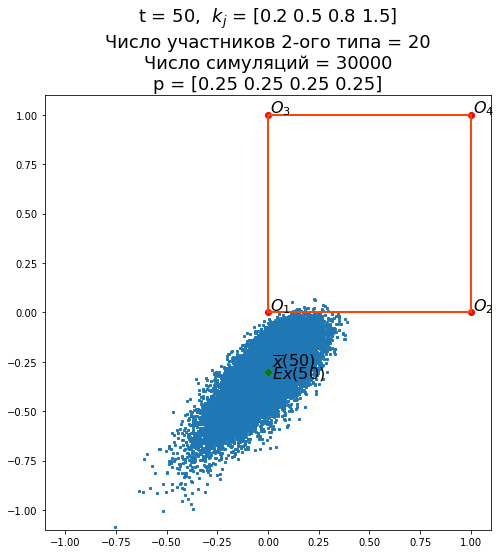

--- 112.19018507003784 seconds ---


In [20]:
#
#    with new shift function 
#

#    trajectory of points
#
t = 50       # amount of steps
M = 30000    # amount of simulation
N = 20      # amount of points in system simulation
k = [0.2, 0.5, 0.8, 1.5]     # coef for shift      <-- must be changed simultaneously
n = 4      # amount of points centers               <-- must be changed simultaneously 

points_O = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])           #   <-- must be changed simultaneously
# points_O = np.random.rand(n, 2)
point_names = []
for i in range(len(points_O)):
    point_names.append(f'$O_{i+1}$')

p = np.full((n), 1./n)    # probability of choosing a center
# p = np.random.rand(n)
# p = p / p.sum()

plot_step = (0, 1, 2, 3, 10, 20, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [1, 1], [0, 1]]), fc='none', ec='orangered', lw=2)
# polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)


if( not isinstance(k, (collections.abc.Sequence, np.ndarray))):
    k=np.full(len(O), k)
else:
    k=np.array(k)


points = np.zeros((t, M, N, 2))
points[0] = np.random.rand(M, N, 2)

start_time = time.time()

for i in tqdm(range(1, t)):
    for j in range(M):
        points[i, j] = shift(x=points[i-1, j], k=k, O=points_O, p=p)
        points[i, j][:, 0].fill(points[i, j].sum(axis=0)[0] / N)
        points[i, j][:, 1].fill(points[i, j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(8,8))
        plt.scatter(points[i, :, :, 0], points[i, :, :, 1], s=1)
        for ii, txt in enumerate(point_names):
            plt.annotate(txt, (points_O[ii, 0], points_O[ii, 1]), 
                         xytext=(points_O[ii, 0] + 0.01, points_O[ii, 1] + 0.01), fontsize=16)
        plt.title(f't = {i},  $k_j$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
        plt.show()
        
        

plt.figure(figsize=(8,8))

plt.scatter(points[-1, :, :, 0], points[-1, :, :, 1], s=1) # last position

plt.scatter(points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean(), color='orange') # mean of simulations
plt.annotate('$\overline{x}(%d)}$' %t, (points[-1, :, :, 0].mean(), points[-1, :, :, 1].mean()), 
             xytext=(points[-1, :, :, 0].mean() + 0.02, points[-1, :, :, 1].mean() + 0.03),
             fontsize=16
            )

ev = (p * k).sum()**t * points[0].mean(axis=0).mean(axis=0) \
    + 1./(1 - (p * k).sum()) * ((p * (1 - k)).reshape((n, 1)) * points_O).sum(axis=0)
plt.scatter(ev[0], ev[1], color='green') # predicted mean
plt.annotate(f'$Ex({t})$', (ev[0], ev[1]), xytext=(ev[0] + 0.02, ev[1] - 0.03), fontsize=16)

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(points_O[i, 0] + 0.01, points_O[i, 1] + 0.01),
                 fontsize=16
                )

plt.gca().add_patch(copy(polygon)) 

plt.title(f't = {t},  $k_j$ = {k}\nЧисло участников 2-ого типа = {N}\nЧисло симуляций = {M}\np = {p}', fontsize=18)
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.show()


print("--- %s seconds ---" % (time.time() - start_time))

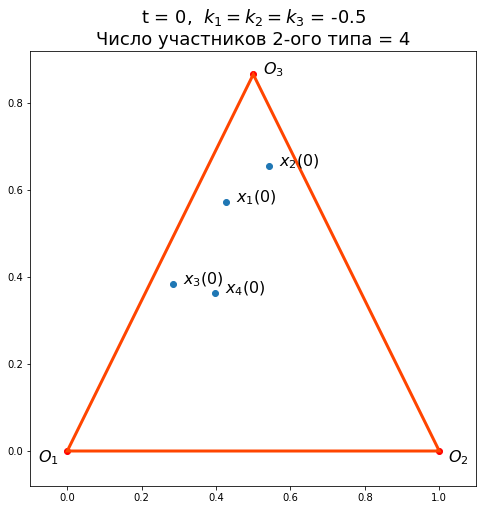

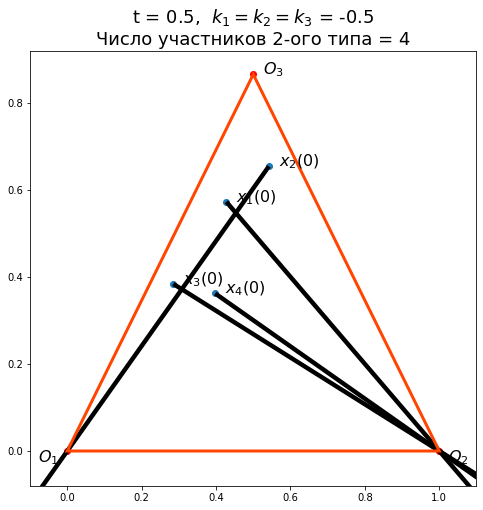

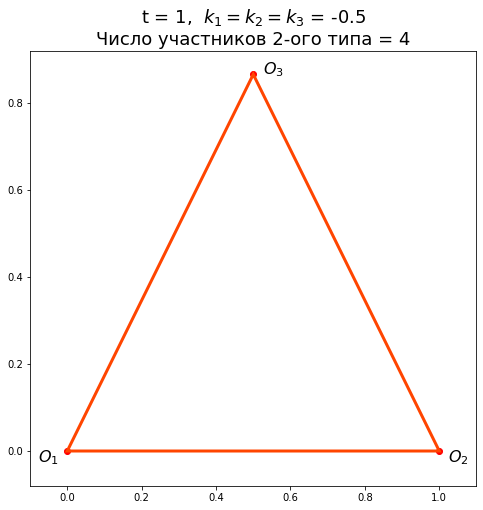

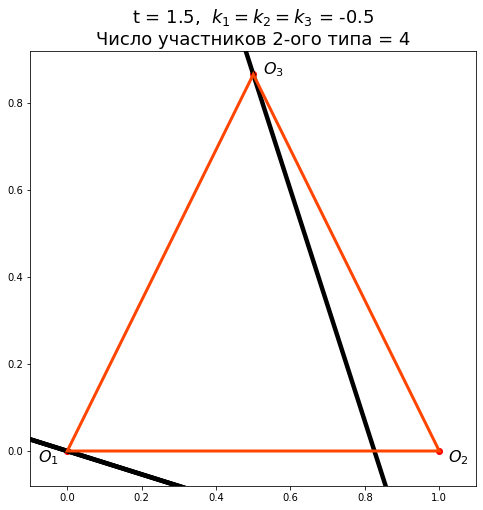

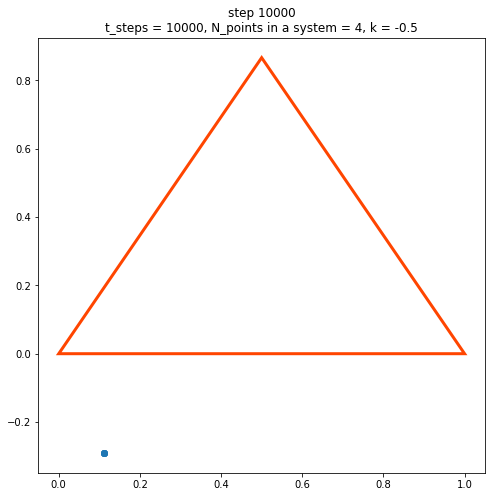

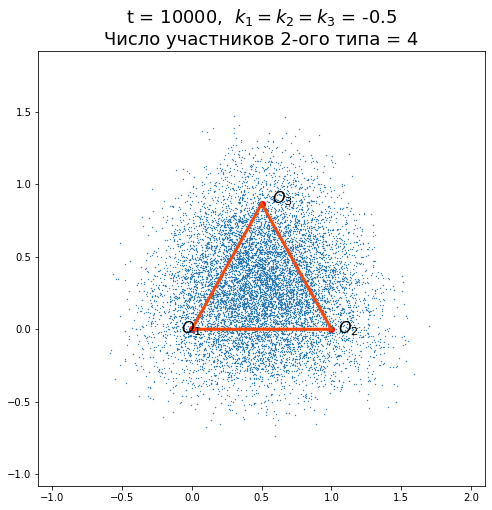

In [70]:
#
#    trajectory of points
#
n = 10000       # amount of steps
M = 1    # amount of simulation
N = 4      # amount of points in system simulation
k = -0.5     # coef for shift
plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [0, 1]]), fc='none', ec='orangered', lw=3)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)

point_names = ['$O_1$', ' $O_2$', '  $O_3$']
points_O = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]])


points = np.zeros((n, N, 2))
points[0] = np.random.rand(N, 2)
points[0][points[0, :, 0] + points[0, :, 1] >= 1] = -points[0][points[0, :, 0] + points[0, :, 1] >= 1] + 1

#########################################################################
# step 0
plt.figure(figsize=(8,8))
plt.scatter(points[0, :, 0] + 0.5 * points[0, :, 1], np.sqrt(3) / 2 * points[0, :, 1])

for i in range(N):
    plt.annotate(f'  $x_{i+1}(0)$', (points[0, i, 0] + 0.5 * points[0, i, 1], np.sqrt(3) / 2 * points[0, i, 1]),
                fontsize=16
                )

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')

for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(np.array((-0.08, 1.01, 0.5))[i], 
                                                                np.array((-0.025, -0.025, np.sqrt(3) / 2))[i]),
                 fontsize=16
                )
    
plt.gca().add_patch(copy(polygon2))    

plt.title(f't = {0},  $k_1 = k_2 = k_3$ = {k}\nЧисло участников 2-ого типа = {N}', fontsize=18)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.08, 0.92))
plt.show()


#########################################################################
# step = 0.5
points[1] = np.array([shift(x, k) for x in points[0]])

plt.figure(figsize=(8,8))
plt.scatter(points[0:2, :, 0] + 0.5 * points[0:2, :, 1], np.sqrt(3) / 2 * points[0:2, :, 1])

for i in range(N):
    plt.annotate(f'  $x_{i+1}(0)$', (points[0, i, 0] + 0.5 * points[0, i, 1], np.sqrt(3) / 2 * points[0, i, 1]),
                fontsize=16)
    plt.annotate(f'  $x_{i+1}(0.5)$', (points[1, i, 0] + 0.5 * points[1, i, 1], np.sqrt(3) / 2 * points[1, i, 1]),
                fontsize=16)


plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(np.array((-0.08, 1.01, 0.5))[i], 
                                                                np.array((-0.025, -0.025, np.sqrt(3) / 2))[i]),
                 fontsize=16
                )

    
plt.quiver(points[0, :, 0] + 0.5 * points[0, :, 1],
           np.sqrt(3) / 2 * points[0, :, 1],
           points[1, :, 0] + 0.5 * points[1, :, 1] - (points[0, :, 0] + 0.5 * points[0, :, 1]), 
           np.sqrt(3) / 2 * (points[1, :, 1] - points[0, :, 1]), 
           angles='xy', scale_units='xy', scale=1, width = 0.01)
    
plt.gca().add_patch(copy(polygon2))
    
plt.title(f't = {0.5},  $k_1 = k_2 = k_3$ = {k}\nЧисло участников 2-ого типа = {N}', fontsize=18)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.08, 0.92))
plt.show()


#########################################################################
#step = 1

plt.figure(figsize=(8,8))
plt.scatter(points[1, :, 0] + 0.5 * points[1, :, 1], np.sqrt(3) / 2 * points[1, :, 1])

for i in range(N):
    plt.annotate(f'  $x_{i+1}(0.5)$', (points[1, i, 0] + 0.5 * points[1, i, 1], np.sqrt(3) / 2 * points[1, i, 1]),
                fontsize=16)


plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(np.array((-0.08, 1.01, 0.5))[i], 
                                                                np.array((-0.025, -0.025, np.sqrt(3) / 2))[i]),
                 fontsize=16
                )

    
plt.quiver(points[1, :, 0] + 0.5 * points[1, :, 1],
           np.sqrt(3) / 2 * points[1, :, 1],
           np.ones(points[1, :, 1].shape) * (points[1, :, 0].mean() + 0.5 * points[1, :, 1].mean()) - (points[1, :, 0] + 0.5 * points[1, :, 1]), 
           np.sqrt(3) / 2 * (np.ones(points[1, :, 1].shape) * points[1, :, 1].mean() - points[1, :, 1]), 
           angles='xy', scale_units='xy', scale=1, width = 0.01, color='green')

plt.scatter(points[1, :, 0].mean() + 0.5 * points[1, :, 1].mean(), np.sqrt(3) / 2 * points[1, :, 1].mean())
plt.annotate(f'  $x(1)$', (points[1, :, 0].mean() + 0.5 * points[1, :, 1].mean(),
                       np.sqrt(3) / 2 * points[1, :, 1].mean()),
            fontsize=16)

plt.gca().add_patch(copy(polygon2))

plt.title(f't = {1},  $k_1 = k_2 = k_3$ = {k}\nЧисло участников 2-ого типа = {N}', fontsize=18)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.08, 0.92))
plt.show()


#########################################################################
#step = 1 + 0.5

points[1][:, 0].fill(points[1].sum(axis=0)[0] / N)
points[1][:, 1].fill(points[1].sum(axis=0)[1] / N)

points[2] = np.array([shift(x, k) for x in points[1]])

plt.figure(figsize=(8,8))
plt.scatter(points[1:3, :, 0] + 0.5 * points[1:3, :, 1], np.sqrt(3) / 2 * points[1:3, :, 1])

plt.annotate(f'  x(1)', (points[1, 0, 0] + 0.5 * points[1, 0, 1], np.sqrt(3) / 2 * points[1, 0, 1]), fontsize=16)
for i in range(N):
    plt.annotate(f'  $x_{i+1}(1.5)$', (points[2, i, 0] + 0.5 * points[2, i, 1], np.sqrt(3) / 2 * points[2, i, 1]),
                 xytext=(points[2, i, 0] + 0.5 * points[2, i, 1] + (-1)**i * 0.01 * i, 
                         np.sqrt(3) / 2 * points[2, i, 1] - (-1)**i * 0.01 * i),
                 fontsize=16)


plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(np.array((-0.08, 1.01, 0.5))[i], 
                                                                np.array((-0.025, -0.025, np.sqrt(3) / 2))[i]),
                 fontsize=16
                )

    
plt.quiver(points[1, :, 0] + 0.5 * points[1, :, 1],
           np.sqrt(3) / 2 * points[1, :, 1],
           points[2, :, 0] + 0.5 * points[2, :, 1] - (points[1, :, 0] + 0.5 * points[1, :, 1]), 
           np.sqrt(3) / 2 * (points[2, :, 1] - points[1, :, 1]), 
           angles='xy', scale_units='xy', scale=1, width = 0.01)

plt.gca().add_patch(copy(polygon2))

plt.title(f't = {1.5},  $k_1 = k_2 = k_3$ = {k}\nЧисло участников 2-ого типа = {N}', fontsize=18)
plt.xlim((-0.1, 1.1))
plt.ylim((-0.08, 0.92))
plt.show()


#########################################################################
###################################################################

for i in range(1, n):
    points[i] = np.array([shift(x, k) for x in points[i-1]])
    '''
    if i in plot_step:
        plt.figure(figsize=(8,8))
        plt.scatter(points[i, :, 0] + 0.5 * points[i, :, 1], np.sqrt(3) / 2 * points[i, :, 1])
        #plt.scatter(1./3, 1./3, marker='o', color='red') 
        #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
        #plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='+', color='green')
        #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
        #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
        #            marker='+', color='green')
        plt.gca().add_patch(copy(polygon2))
        #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
        plt.title(f'step {i}\nt_steps = {n},  N_points in a system = {N}, k = {k}')
        plt.show()
    '''
    points[i][:, 0].fill(points[i].sum(axis=0)[0] / N)
    points[i][:, 1].fill(points[i].sum(axis=0)[1] / N)
        
plt.figure(figsize=(8,8))
plt.scatter(points[i, :, 0] + 0.5 * points[i, :, 1], np.sqrt(3) / 2 * points[i, :, 1])
#plt.scatter(1./3, 1./3, marker='o', color='red', s=1)
#plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
#plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
#            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
#            marker='+', color='green')
plt.gca().add_patch(copy(polygon2))
plt.title(f'step {i+1}\nt_steps = {n}, N_points in a system = {N}, k = {k}')
plt.show()

# trajectory
plt.figure(figsize=(8,8))

plt.scatter(points_O[:, 0], points_O[:, 1] , color='red')
for i, txt in enumerate(point_names):
    plt.annotate(txt, (points_O[i, 0], points_O[i, 1]), xytext=(np.array((-0.08, 1.01, 0.5))[i], 
                                                                np.array((-0.025, -0.025, np.sqrt(3) / 2))[i]),
                 fontsize=16
                )

# plt.annotate(f'  x({n})', (points[-1, 0, 0] + 0.5 * points[-1, 0, 1], np.sqrt(3) / 2 * points[-1, 0, 1]), fontsize=16)
    
plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=0.1)
plt.gca().add_patch(copy(polygon2)) 

plt.title(f't = {n},  $k_1 = k_2 = k_3$ = {k}\nЧисло участников 2-ого типа = {N}', fontsize=18) # N_points in a system =
plt.xlim((-1.1, 2.1))
plt.ylim((-1.08, 1.92))
plt.show()


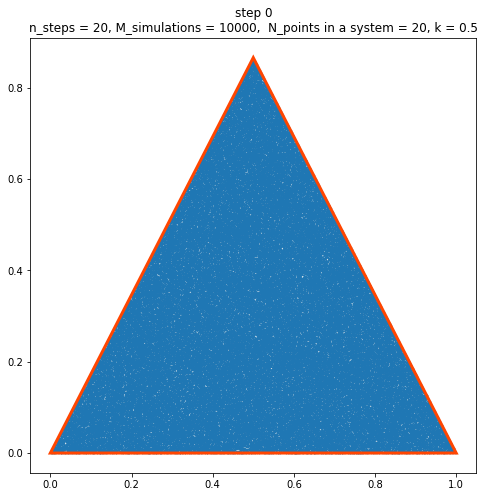

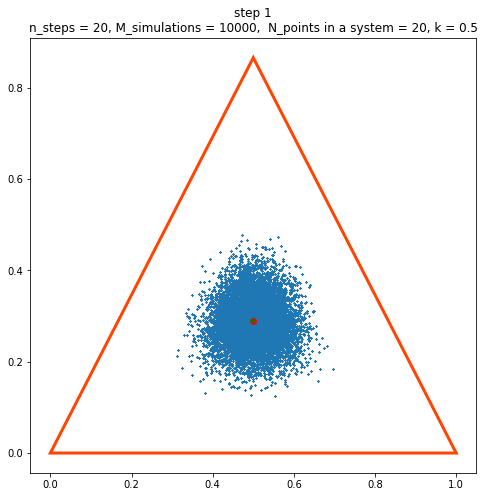

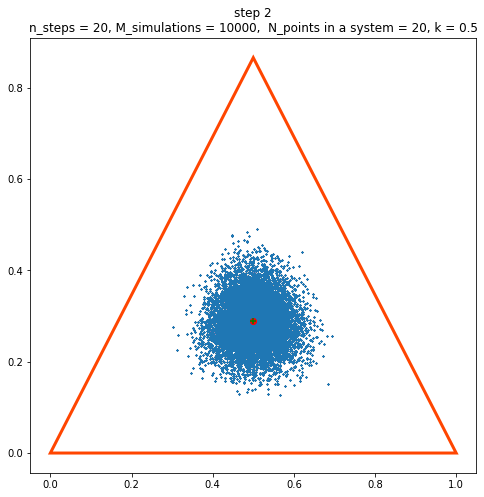

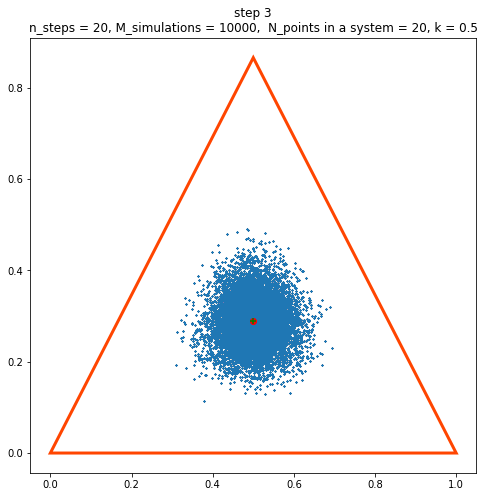

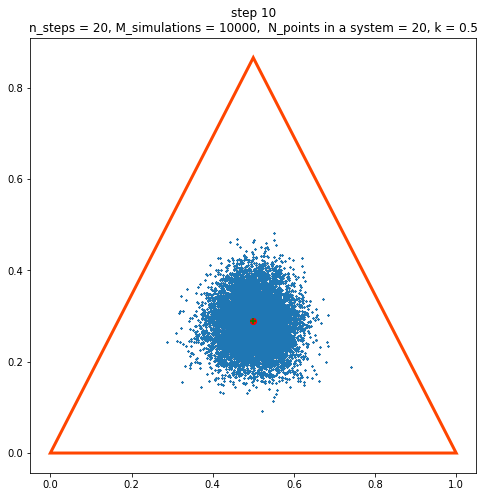

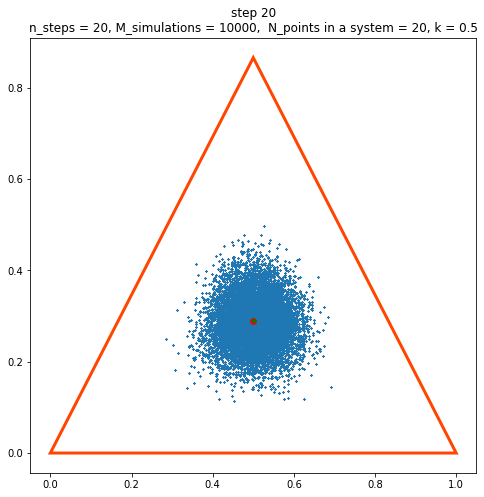

In [4]:
#
#    point are dependent according to variant 2 (case 2)
#
n = 20       # amount of steps
M = 10000    # amount of simulation
N = 20      # amount of points in system simulation
k = 0.5     # coef for shift
plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [0, 1]]), fc='none', ec='orangered', lw=3)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)



points = np.random.rand(M, N, 2)
# make all points in triangдe
points[points[:, :, 0] + points[:, :, 1] >= 1] = -points[points[:, :, 0] + points[:, :, 1] >= 1] + 1

plt.figure(figsize=(8,8))
#plt.scatter(points[:, :, 0], points[:, :, 1], marker='.')
plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#plt.scatter(1./3, 1./3, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
plt.gca().add_patch(copy(polygon2))
plt.title(f'step 0\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N}, k = {k}')

plt.show()

for i in range(1, n+1):
    for j in range(M):
        points[j] = np.array([shift(x, k) for x in points[j]])
        points[j][:, 0].fill(points[j].sum(axis=0)[0] / N)
        points[j][:, 1].fill(points[j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(8,8))
        plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
        #plt.scatter(1./3, 1./3, marker='o', color='red') 
        plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
        #plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='+', color='green')
        plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
                    np.sqrt(3) / 2 * points[:, :, 1].mean(), 
                    marker='+', color='green')
        plt.gca().add_patch(copy(polygon2))
        #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
        plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N}, k = {k}')
        plt.show()
        
plt.figure(figsize=(8,8))
plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#plt.scatter(1./3, 1./3, marker='o', color='red', s=1)
plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
            marker='+', color='green')
plt.gca().add_patch(copy(polygon2))
plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N}, k = {k}')
plt.show()


In [7]:
print(np.cov(points[:, 1, :].T), '\n')
eigenvalues, eigenvectors = LA.eig(np.cov(points[:, 1, :].T))
print(eigenvalues,'\n')
print(eigenvectors, '\n')

[[ 0.00370763 -0.00184026]
 [-0.00184026  0.00372858]] 

[0.00187782 0.00555839] 

[[-0.70911657  0.70509127]
 [-0.70509127 -0.70911657]] 



In [72]:
eigenvalues, eigenvectors = LA.eig(np.cov(points[:, 1, :].T))

In [73]:
eigenvalues

array([0.00180958, 0.00560445])

In [74]:
eigenvectors

array([[-0.71209202,  0.70208614],
       [-0.70208614, -0.71209202]])

In [76]:
points[:, :, 0].mean(), points[:, :, 1].mean()

(0.33238274831964676, 0.3340669280583805)

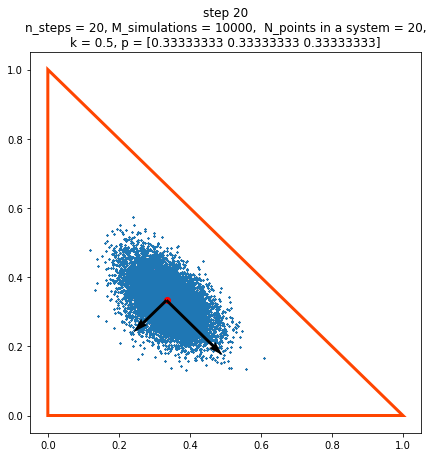

In [10]:
V = eigenvectors * np.sqrt(eigenvalues) * 3
origin = np.array([[points[:, :, 0].mean(), points[:, :, 0].mean()],
                   [points[:, :, 1].mean(), points[:, :, 1].mean()]]) # origin point

plt.figure(figsize=(7,7))

plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')    # mean point
plt.quiver(*origin, V[0,:], V[1,:], angles='xy', scale_units='xy', scale=1)
plt.gca().add_patch(copy(polygon))
plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, p = {np.ones(3) / 3}')
plt.show()

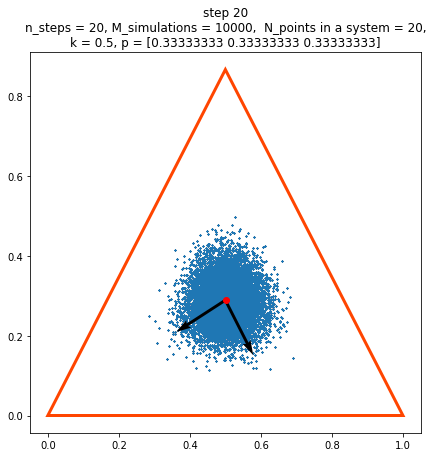

In [11]:
V = eigenvectors * np.sqrt(eigenvalues) * 3
origin = np.array([[0.5, 0.5],
                   [np.sqrt(3) / 6, np.sqrt(3) / 6]]) # origin point

plt.figure(figsize=(7,7))

plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
plt.quiver(*origin, V[0,:] + 0.5*V[1,:], np.sqrt(3) / 2 * V[1,:], angles='xy', scale_units='xy', scale=1)
plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
            marker='o', color='red')
plt.gca().add_patch(copy(polygon2))
plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, p = {np.ones(3) / 3}')
plt.show()

In [113]:
points.shape

(100, 5, 2)

In [114]:
points.sum(axis=1).shape

(100, 2)

In [118]:
points[0].sum(axis=0).shape

(2,)

In [149]:
points[:, :, 0]

array([[0.31143711, 0.31143711, 0.31143711, ..., 0.31143711, 0.31143711,
        0.31143711],
       [0.40615336, 0.40615336, 0.40615336, ..., 0.40615336, 0.40615336,
        0.40615336],
       [0.32914716, 0.32914716, 0.32914716, ..., 0.32914716, 0.32914716,
        0.32914716],
       ...,
       [0.4464401 , 0.4464401 , 0.4464401 , ..., 0.4464401 , 0.4464401 ,
        0.4464401 ],
       [0.3296606 , 0.3296606 , 0.3296606 , ..., 0.3296606 , 0.3296606 ,
        0.3296606 ],
       [0.37507715, 0.37507715, 0.37507715, ..., 0.37507715, 0.37507715,
        0.37507715]])

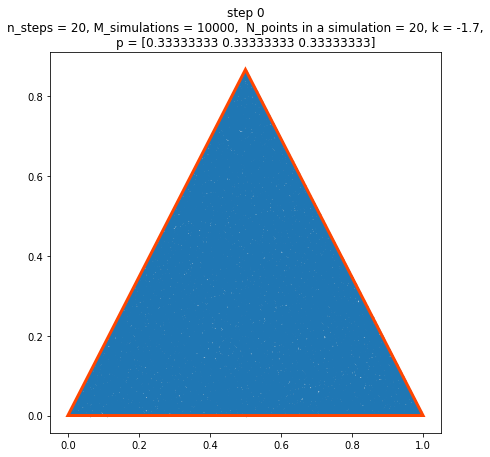

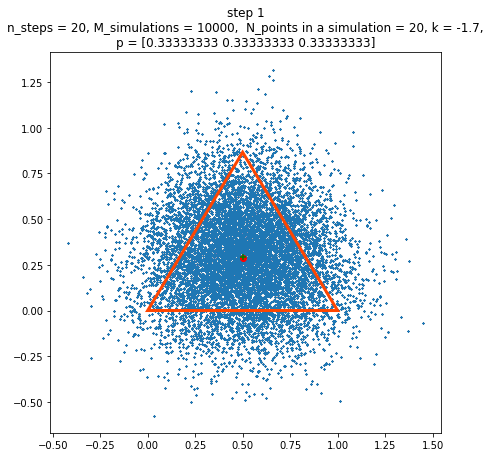

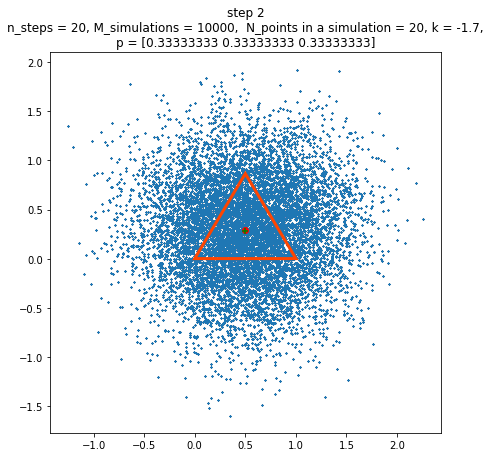

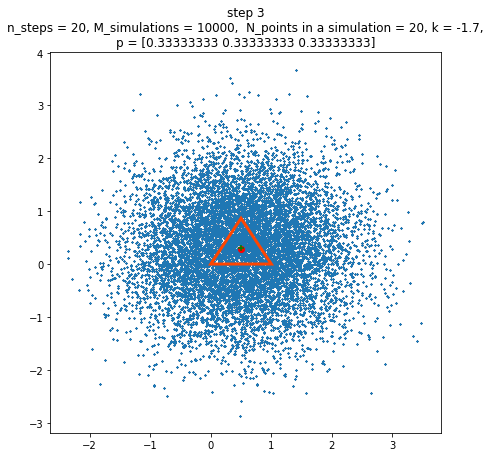

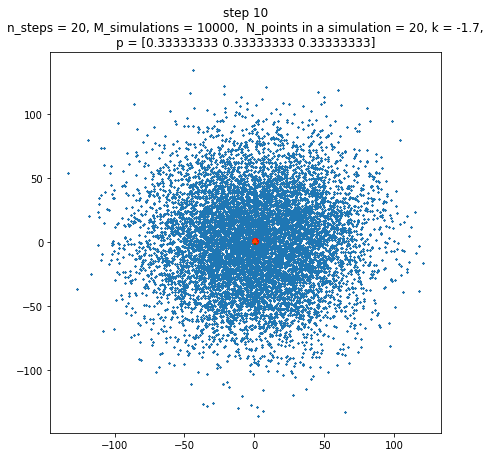

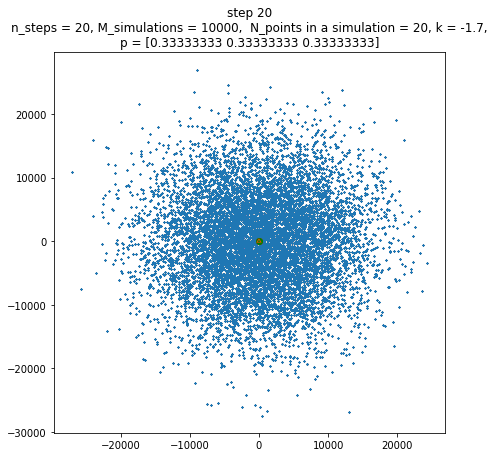

In [21]:
#
#    point are dependent according to variant 2 (case 2)
#
n = 20                # amount of steps
M = 10000              # amount of simulation
N = 20                # amount of points in system simulation
k = -1.7              # coef for shift
p = np.ones(3) / 3    # probabilities to shift to points [0, 0], [1, 0], [0, 1]
#p = [0.5, 0.35, 0.15]

plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [0, 1]]), fc='none', ec='orangered', lw=3)
polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)



points = np.random.rand(M, N, 2)
# make all points in triangдe
points[points[:, :, 0] + points[:, :, 1] >= 1] = -points[points[:, :, 0] + points[:, :, 1] >= 1] + 1

plt.figure(figsize=(7,7))
#plt.scatter(points[:, :, 0], points[:, :, 1], marker='.')
plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#plt.scatter(1./3, 1./3, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
plt.gca().add_patch(copy(polygon2))
plt.title(f'step 0\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N}, k = {k},\np = {p}')

plt.show()

for i in range(1, n+1):
    for j in range(M):
        points[j] = np.array([shift(x, k=k, p=p) for x in points[j]])
        points[j][:, 0].fill(points[j].sum(axis=0)[0] / N)
        points[j][:, 1].fill(points[j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(7,7))
        plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
        #plt.scatter(1./3, 1./3, marker='o', color='red') 
        plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
        #plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='+', color='green')
        plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
                    np.sqrt(3) / 2 * points[:, :, 1].mean(), 
                    marker='o', color='green')
        plt.gca().add_patch(copy(polygon2))
        #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
        plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N}, k = {k},\np = {p}')
        plt.show()
        
plt.figure(figsize=(7,7))
plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#plt.scatter(1./3, 1./3, marker='o', color='red', s=1)
plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
            marker='o', color='green')
plt.gca().add_patch(copy(polygon2))
plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N}, k = {k},\np = {p}')
plt.show()


In [12]:
# to be done
def shift4(x, k=0.5, k4=1.5, p=[0.25, 0.25, 0.25, 0.25]):
    #
    #  shape of x = 2
    #
    prob = np.random.uniform(0, 1)
    #print(prob)
    #ans = x * k
    # go to B (1, 0)
    if prob < p[0]:
        ans = x * k + (1-k) * np.array((1, 0)) 
    # go to C (0, 1)
    elif prob < p[0] + p[1]:
        ans = x * k + (1-k) * np.array((0, 1))
    # go to A (0, 0)
    elif prob < p[0] + p[1] + p[2]:
        ans = x * k
    else:
        # go to D (1, 1)
        ans = x * k4 + (1-k4) * np.array((1, 1))
    return ans

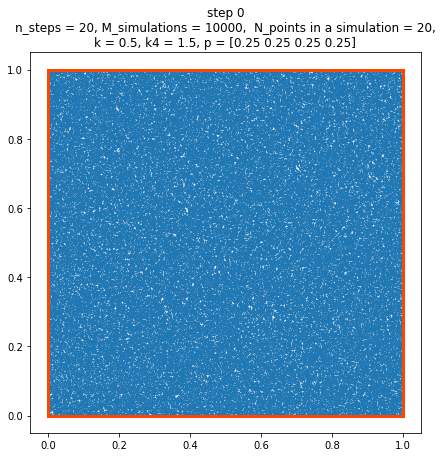

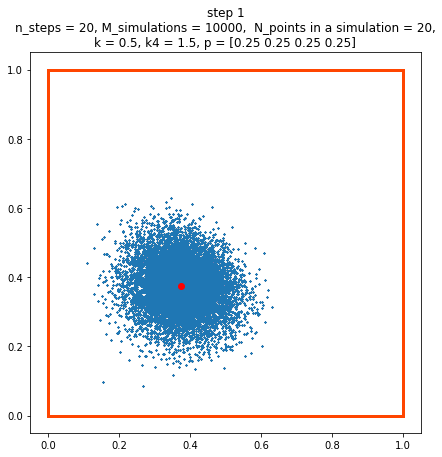

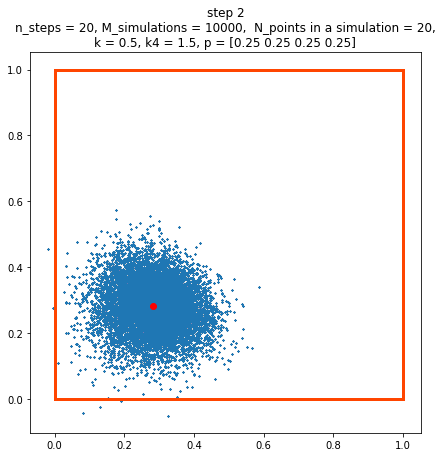

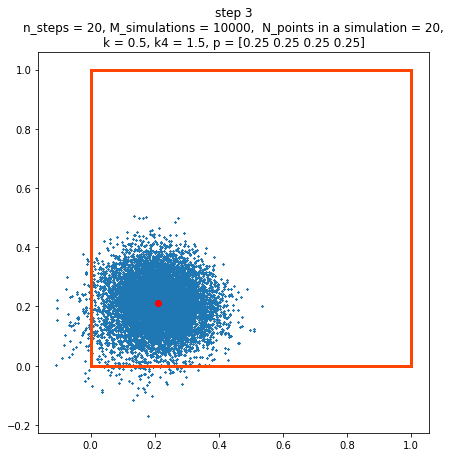

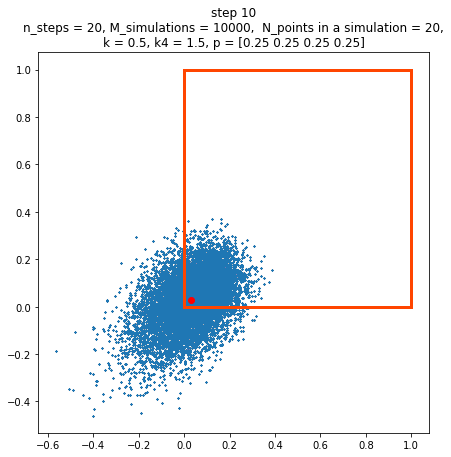

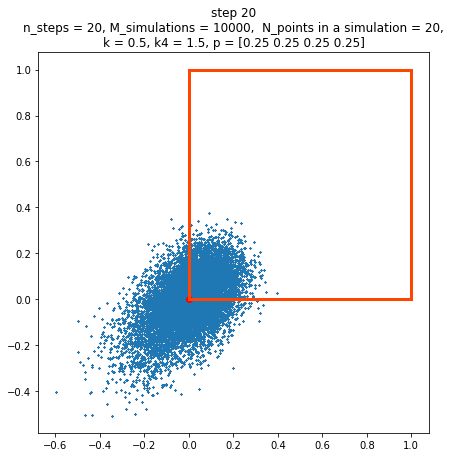

In [18]:
#
#    "new problem" 4 points
#
#    point are dependent according to variant 2 (case 2)
#
n = 20                # amount of steps
M = 10000              # amount of simulation
N = 20                # amount of points in system simulation
k = 0.5              # coef for shift
k4 = 1.5
p = np.ones(4) / 4    # probabilities to shift to points [0, 0], [1, 0], [0, 1], [1, 1]
#p = [0.5, 0.25, 0.125, 0.125]

plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [1, 1], [0, 1]]), fc='none', ec='orangered', lw=3)
#polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)



points = np.random.rand(M, N, 2)
# make all points in triangдe
#points[points[:, :, 0] + points[:, :, 1] >= 1] = -points[points[:, :, 0] + points[:, :, 1] >= 1] + 1

plt.figure(figsize=(7,7))
plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
#plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#plt.scatter(1./3, 1./3, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
plt.gca().add_patch(copy(polygon))
plt.title(f'step 0\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')

plt.show()

for i in range(1, n+1):
    for j in range(M):
        points[j] = np.array([shift4(x, k=k, k4=k4, p=p) for x in points[j]])
        points[j][:, 0].fill(points[j].sum(axis=0)[0] / N)
        points[j][:, 1].fill(points[j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(7,7))
        plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
        #plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
        #plt.scatter(1./3, 1./3, marker='o', color='red') 
        #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
        plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')
        #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
        #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
        #            marker='o', color='green')
        plt.gca().add_patch(copy(polygon))
        #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
        plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')
        plt.show()
        
plt.figure(figsize=(7,7))
plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
#plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#
#plt.scatter(0.5, 0.5, marker='o', color='red', s=1)    # center point
#
#plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')    # mean point
#plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
#            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
#            marker='o', color='green')
plt.gca().add_patch(copy(polygon))
plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')
plt.show()


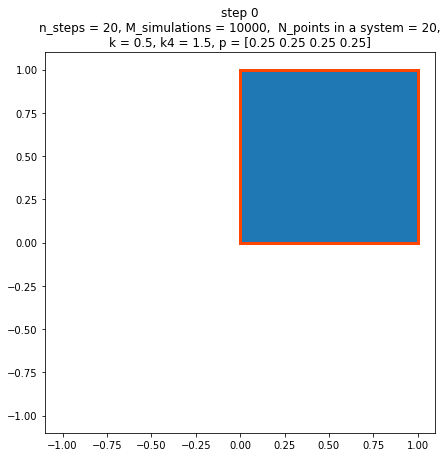

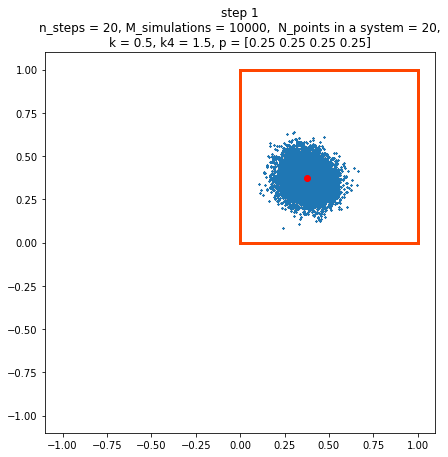

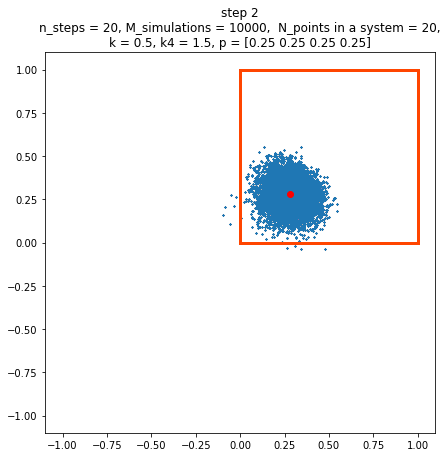

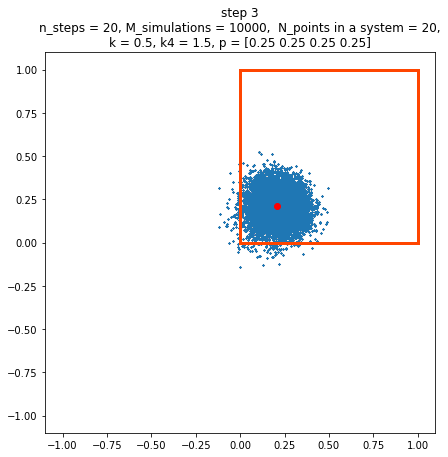

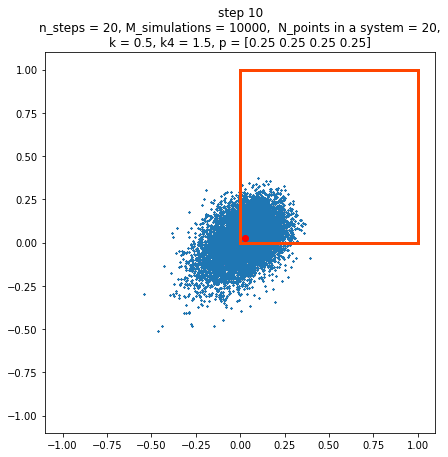

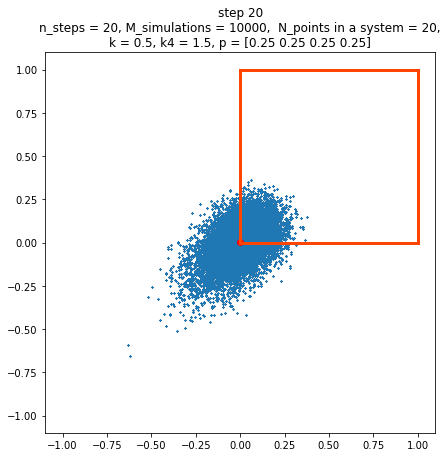

In [13]:
#
#    "new problem" 4 points
#
#    point are dependent according to variant 2 (case 2)
#
n = 20               # amount of steps
M = 10000              # amount of simulation
N = 20                # amount of points in system simulation
k = 0.5              # coef for shift
k4 = 1.5
p = np.ones(4) / 4    # probabilities to shift to points [0, 0], [1, 0], [0, 1], [1, 1]
#p = [0.5, 0.25, 0.125, 0.125]

plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [1, 1], [0, 1]]), fc='none', ec='orangered', lw=3)
#polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)



points = np.random.rand(M, N, 2)
# make all points in triangдe
#points[points[:, :, 0] + points[:, :, 1] >= 1] = -points[points[:, :, 0] + points[:, :, 1] >= 1] + 1

plt.figure(figsize=(7,7))
plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
#plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#plt.scatter(1./3, 1./3, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
plt.gca().add_patch(copy(polygon))
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.title(f'step 0\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')

plt.show()

for i in range(1, n+1):
    for j in range(M):
        points[j] = np.array([shift4(x, k=k, k4=k4, p=p) for x in points[j]])
        points[j][:, 0].fill(points[j].sum(axis=0)[0] / N)
        points[j][:, 1].fill(points[j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(7,7))
        plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
        #plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
        #plt.scatter(1./3, 1./3, marker='o', color='red') 
        #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
        plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')
        #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
        #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
        #            marker='o', color='green')
        plt.gca().add_patch(copy(polygon))
        plt.xlim((-1.1, 1.1))
        plt.ylim((-1.1, 1.1))
        #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
        plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')
        plt.show()
        
plt.figure(figsize=(7,7))
plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
#plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#
#plt.scatter(0.5, 0.5, marker='o', color='red', s=1)    # center point
#
#plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')    # mean point
#plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
#            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
#            marker='o', color='green')
plt.gca().add_patch(copy(polygon))
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')
plt.show()


In [8]:
np.shape(points)

(10000, 20, 2)

In [14]:
print(np.cov(points[:, 1, :].T), '\n')
eigenvalues, eigenvectors = LA.eig(np.cov(points[:, 1, :].T))
print(eigenvalues,'\n')
print(eigenvectors, '\n')

[[0.01422161 0.00702789]
 [0.00702789 0.01459136]] 

[0.00737616 0.0214368 ] 

[[-0.71634367 -0.69774762]
 [ 0.69774762 -0.71634367]] 



In [11]:
eigenvalues, eigenvectors = LA.eig(np.cov(points[:, 1, :].T))

In [12]:
eigenvalues

array([0.02210492, 0.00746453])

In [40]:
eigenvectors

array([[ 0.71005472, -0.7041465 ],
       [ 0.7041465 ,  0.71005472]])

In [61]:
(eigenvectors * eigenvalues)[:, 0]

array([0.01569571, 0.0155651 ])

In [43]:
eigenvectors[:, 0] * eigenvalues[0]

array([0.01569571, 0.0155651 ])

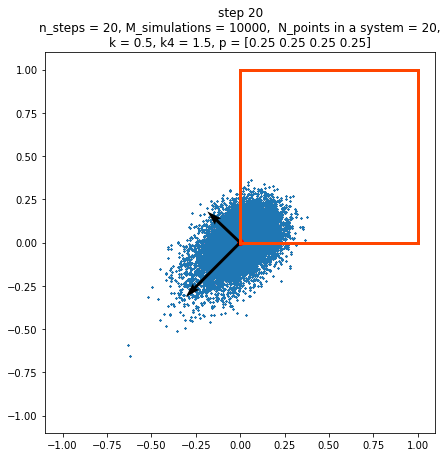

In [15]:
V = eigenvectors * np.sqrt(eigenvalues) * 3
origin = np.array([[0, 0],[0, 0]]) # origin point

plt.figure(figsize=(7,7))

plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')    # mean point
plt.quiver(*origin, V[0,:], V[1,:], angles='xy', scale_units='xy', scale=1)
plt.gca().add_patch(copy(polygon))
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')
plt.show()
plt.show()

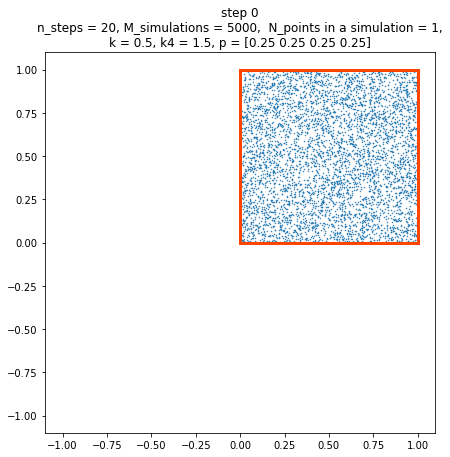

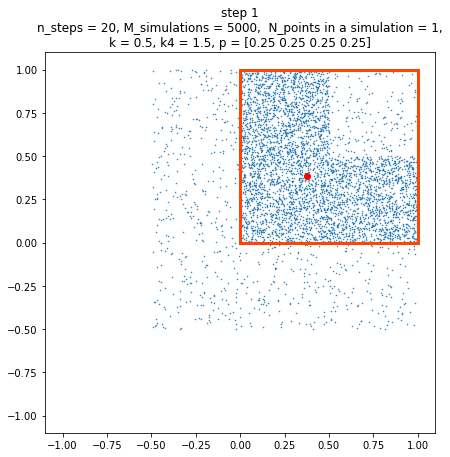

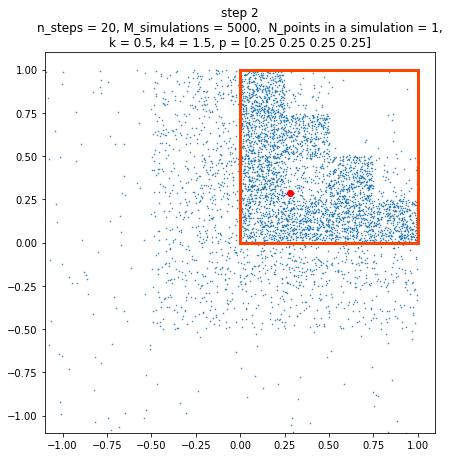

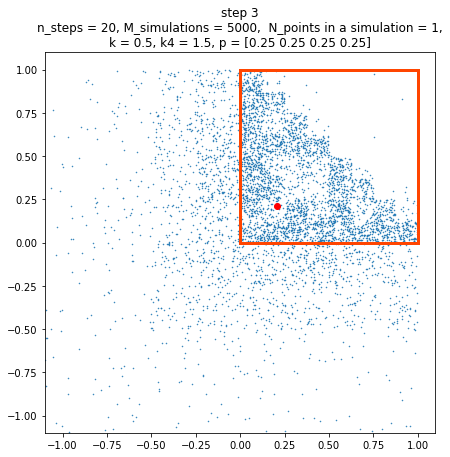

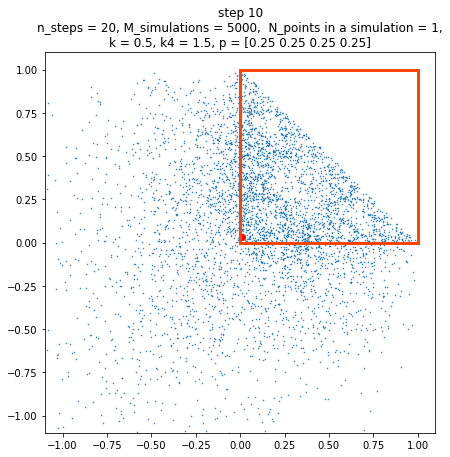

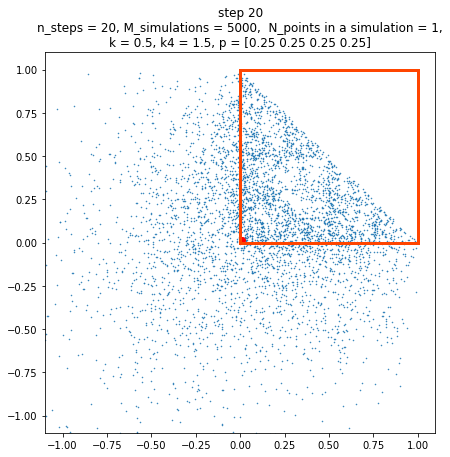

In [17]:
#
#    "new problem" 4 points
#
#    point are dependent according to variant 2 (case 2)
#
n = 20               # amount of steps
M = 5000              # amount of simulation
N = 1                # amount of points in system simulation
k = 0.5              # coef for shift
k4 = 1.5
p = np.ones(4) / 4    # probabilities to shift to points [0, 0], [1, 0], [0, 1], [1, 1]
#p = [0.5, 0.25, 0.125, 0.125]

plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [1, 1], [0, 1]]), fc='none', ec='orangered', lw=3)
#polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)



points = np.random.rand(M, N, 2)
# make all points in triangдe
#points[points[:, :, 0] + points[:, :, 1] >= 1] = -points[points[:, :, 0] + points[:, :, 1] >= 1] + 1

plt.figure(figsize=(7,7))
plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
#plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#plt.scatter(1./3, 1./3, marker='o', color='red')
#plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='.', color='green')
plt.gca().add_patch(copy(polygon))
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.title(f'step 0\nn_steps = {n}, M_simulations = {M},  N_points in a simulation = {N},\nk = {k}, k4 = {k4}, p = {p}')

plt.show()

for i in range(1, n+1):
    for j in range(M):
        points[j] = np.array([shift4(x, k=k, k4=k4, p=p) for x in points[j]])
        points[j][:, 0].fill(points[j].sum(axis=0)[0] / N)
        points[j][:, 1].fill(points[j].sum(axis=0)[1] / N)
    if i in plot_step:
        plt.figure(figsize=(7,7))
        plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
        #plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
        #plt.scatter(1./3, 1./3, marker='o', color='red') 
        #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
        plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')
        #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
        #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
        #            marker='o', color='green')
        plt.gca().add_patch(copy(polygon))
        plt.xlim((-1.1, 1.1))
        plt.ylim((-1.1, 1.1))
        #plt.tricontourf(points[:, :, 0].ravel(), points[:, :, 1].ravel(), levels=5, cmap="RdBu_r")
        plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')
        plt.show()
        
plt.figure(figsize=(7,7))
plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
#plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
#
#plt.scatter(0.5, 0.5, marker='o', color='red', s=1)    # center point
#
#plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')    # mean point
#plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
#            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
#            marker='o', color='green')
plt.gca().add_patch(copy(polygon))
plt.xlim((-1.1, 1.1))
plt.ylim((-1.1, 1.1))
plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')
plt.show()


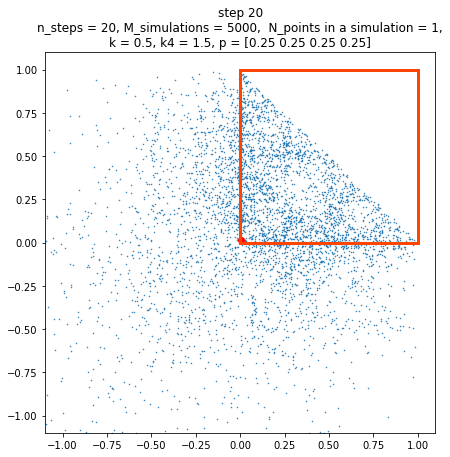

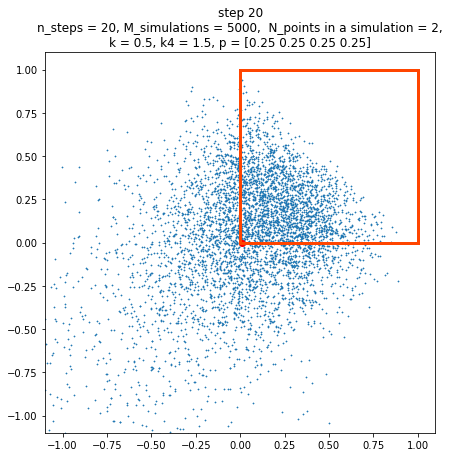

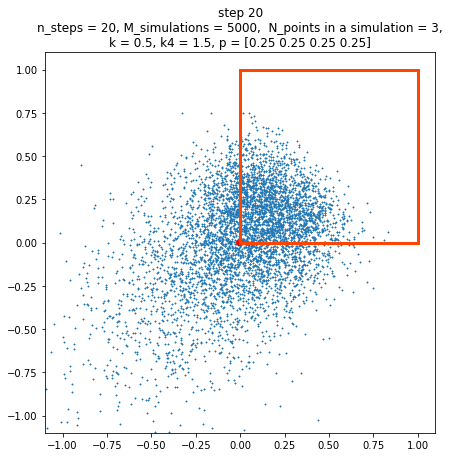

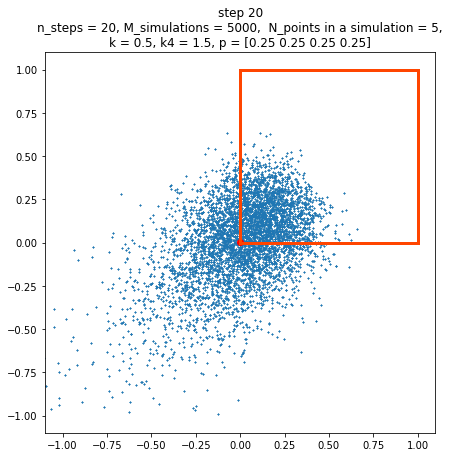

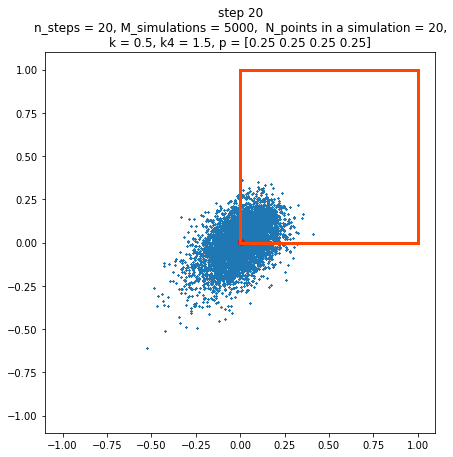

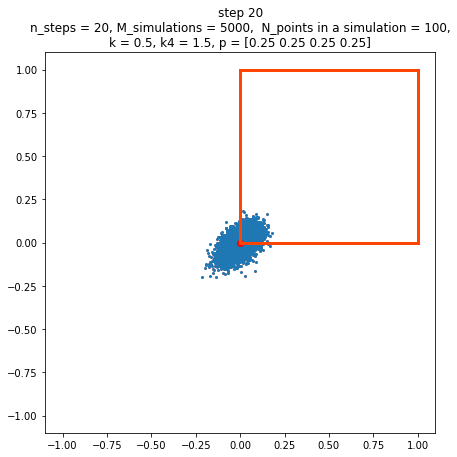

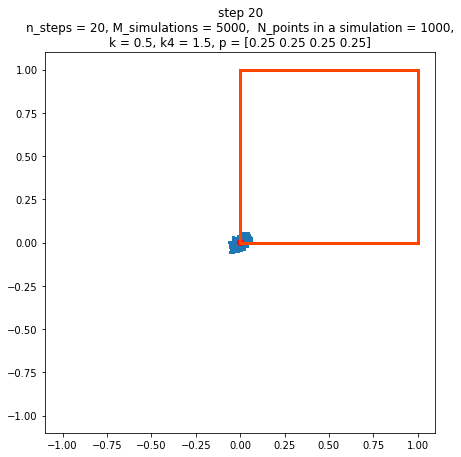

In [18]:
#
#    "new problem" 4 points
#
#    point are dependent according to variant 2 (case 2)
#
n = 20               # amount of steps
M = 5000              # amount of simulation
N = 1                # amount of points in system (simulation)
k = 0.5              # coef for shift
k4 = 1.5
p = np.ones(4) / 4    # probabilities to shift to points [0, 0], [1, 0], [0, 1], [1, 1]
#p = [0.5, 0.25, 0.125, 0.125]

plot_step = (0, 1, 2, 3, 10, 100, 1000, 5000)    # plot on these steps
polygon = Polygon(np.array([[0, 0], [1, 0], [1, 1], [0, 1]]), fc='none', ec='orangered', lw=3)
#polygon2 = Polygon(np.array([[0, 0], [1, 0], [0.5, np.sqrt(3) / 2]]), fc='none', ec='orangered', lw=3)

N_steps = (1, 2, 3, 5, 20, 100, 1000)

for N in N_steps:
    
    points = np.random.rand(M, N, 2)

    for i in range(1, n+1):
        for j in range(M):
            points[j] = np.array([shift4(x, k=k, k4=k4, p=p) for x in points[j]])
            points[j][:, 0].fill(points[j].sum(axis=0)[0] / N)
            points[j][:, 1].fill(points[j].sum(axis=0)[1] / N)

    plt.figure(figsize=(7,7))
    plt.scatter(points[:, :, 0], points[:, :, 1], marker='.', s=1)
    #plt.scatter(points[:, :, 0] + 0.5 * points[:, :, 1], np.sqrt(3) / 2 * points[:, :, 1], marker='.', s=1)
    #
    #plt.scatter(0.5, 0.5, marker='o', color='red', s=1)    # center point
    #
    #plt.scatter(0.5, np.sqrt(3) / 6, marker='o', color='red')
    plt.scatter(points[:, :, 0].mean(), points[:, :, 1].mean(), marker='o', color='red')    # mean point
    #plt.scatter(np.mean(points[:, :, 0] + 0.5 * points[:, :, 1]), 
    #            np.sqrt(3) / 2 * points[:, :, 1].mean(), 
    #            marker='o', color='green')
    plt.gca().add_patch(copy(polygon))
    plt.xlim((-1.1, 1.1))
    plt.ylim((-1.1, 1.1))
    plt.title(f'step {i}\nn_steps = {n}, M_simulations = {M},  N_points in a system = {N},\nk = {k}, k4 = {k4}, p = {p}')
    plt.show()
